#          TELECOM CHURN PROJECT

#### Problem Statement : To analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

#### Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of the customer lifecycle :




 

##### The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

##### The ‘action’ phase: The customer experience starts to become sore in this phase. For example, he/she gets a compelling offer from a competitor, is charged unfairly, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than in the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

##### The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase.

### Let's build the model

In [1]:
# Importing necessary library

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import method for regression from 'sklearn'
from sklearn.linear_model import LinearRegression

# Import 'train_test_split' from 'sklearn' for train-validation-test split
from sklearn.model_selection import train_test_split

# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

# Import the min-max scaled from 'sklearn'
from sklearn.preprocessing import MinMaxScaler

# Import the ridge and LASSO regression models from 'sklearn'
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Import method to compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#Displaying the maximum number of rows
pd.set_option('display.max_columns', None)

#Displaying the maximum number of rows
pd.set_option('display.max_rows', None)

In [4]:
# Reading the data 

tc = pd.read_csv("telecom_churn_data.csv")
tc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# We have 99999 rows which can be called as data points , corresponding to 226 columns which can be called as features or parameters
tc.shape

(99999, 226)

In [6]:
# Checking the info and we found that we have int , float and string datatypes

tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
# Displaying all the columns names 
for col in tc.columns:
    print(col)

mobile_number
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
arpu_6
arpu_7
arpu_8
arpu_9
onnet_mou_6
onnet_mou_7
onnet_mou_8
onnet_mou_9
offnet_mou_6
offnet_mou_7
offnet_mou_8
offnet_mou_9
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_ic_mou_9
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
roam_og_mou_9
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2t_mou_9
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2m_mou_9
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2f_mou_9
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_t2c_mou_9
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
loc_og_mou_9
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2t_mou_9
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2m_mou_9
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2f_mou_9
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_og_mou_

### Missing Value Treatment

In [8]:
# Checking the null values in the data set 
# We can see missing values in some columns and either we can remove rows or drop columns if missing values are greater than
# 40% of the data points in the column.
100*tc.isnull().mean()

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [9]:
# DROPPING THE COLUMNS WHICH HAVE MORE THAN 70% NULL VALUES 

tc.drop(columns=[
    "date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8", "date_of_last_rech_data_9",
    "total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9",
    "max_rech_data_6", "max_rech_data_7", "max_rech_data_8", "max_rech_data_9",
    "count_rech_2g_6", "count_rech_2g_7", "count_rech_2g_8", "count_rech_2g_9",
    "count_rech_3g_6", "count_rech_3g_7", "count_rech_3g_8", "count_rech_3g_9",
    "av_rech_amt_data_6", "av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9",
    "arpu_3g_6", "arpu_3g_7", "arpu_3g_8", "arpu_3g_9", "arpu_2g_6", "arpu_2g_7", "arpu_2g_8", "arpu_2g_9",
    "night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9",
    "fb_user_6" , "fb_user_7" , "fb_user_8" , "fb_user_9" ,
    "loc_og_t2o_mou" , "std_og_t2o_mou" , "loc_ic_t2o_mou" , "last_date_of_month_6" ,
    "last_date_of_month_7"  , "last_date_of_month_8"  , "last_date_of_month_9" 
], inplace=True)
tc.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.8

In [10]:
# counting the total number of missing values having less than 30% missing values
for col in tc.columns:
    missing_count = tc[col].isnull().sum()
    if missing_count > 0:
        print(f"{col}: {missing_count} missing values")

onnet_mou_6: 3937 missing values
onnet_mou_7: 3859 missing values
onnet_mou_8: 5378 missing values
onnet_mou_9: 7745 missing values
offnet_mou_6: 3937 missing values
offnet_mou_7: 3859 missing values
offnet_mou_8: 5378 missing values
offnet_mou_9: 7745 missing values
roam_ic_mou_6: 3937 missing values
roam_ic_mou_7: 3859 missing values
roam_ic_mou_8: 5378 missing values
roam_ic_mou_9: 7745 missing values
roam_og_mou_6: 3937 missing values
roam_og_mou_7: 3859 missing values
roam_og_mou_8: 5378 missing values
roam_og_mou_9: 7745 missing values
loc_og_t2t_mou_6: 3937 missing values
loc_og_t2t_mou_7: 3859 missing values
loc_og_t2t_mou_8: 5378 missing values
loc_og_t2t_mou_9: 7745 missing values
loc_og_t2m_mou_6: 3937 missing values
loc_og_t2m_mou_7: 3859 missing values
loc_og_t2m_mou_8: 5378 missing values
loc_og_t2m_mou_9: 7745 missing values
loc_og_t2f_mou_6: 3937 missing values
loc_og_t2f_mou_7: 3859 missing values
loc_og_t2f_mou_8: 5378 missing values
loc_og_t2f_mou_9: 7745 missing val

In [11]:
# removing the rows which have missing values 
tc_cleaned = ["onnet_mou_6","onnet_mou_7","onnet_mou_8","onnet_mou_9","offnet_mou_6","offnet_mou_7","offnet_mou_8","offnet_mou_9","roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8","roam_ic_mou_9","roam_og_mou_6","roam_og_mou_7","roam_og_mou_8","roam_og_mou_9","loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8","loc_og_t2t_mou_9","loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8","loc_og_t2m_mou_9","loc_og_t2f_mou_6","loc_og_t2f_mou_7","loc_og_t2f_mou_8","loc_og_t2f_mou_9","loc_og_t2c_mou_6","loc_og_t2c_mou_7","loc_og_t2c_mou_8","loc_og_t2c_mou_9","loc_og_mou_6","loc_og_mou_7","loc_og_mou_8","loc_og_mou_9","std_og_t2m_mou_6","std_og_t2m_mou_7","std_og_t2m_mou_8","std_og_t2m_mou_9","std_og_t2f_mou_6","std_og_t2f_mou_7","std_og_t2f_mou_8","std_og_t2f_mou_9","std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8","std_og_t2c_mou_9","std_og_mou_6","std_og_mou_7","std_og_mou_8","std_og_mou_9","isd_og_mou_6","isd_og_mou_7","isd_og_mou_8","isd_og_mou_9","spl_og_mou_6","spl_og_mou_7","spl_og_mou_8","spl_og_mou_9","og_others_6","og_others_7","og_others_8","og_others_9","loc_ic_t2t_mou_6","loc_ic_t2t_mou_7","loc_ic_t2t_mou_8","loc_ic_t2t_mou_9","loc_ic_t2m_mou_6","loc_ic_t2m_mou_7","loc_ic_t2m_mou_8","loc_ic_t2m_mou_9","loc_ic_t2f_mou_6","loc_ic_t2f_mou_7","loc_ic_t2f_mou_8","loc_ic_t2f_mou_9","loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8","loc_ic_mou_9","std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2t_mou_8","std_ic_t2t_mou_9","std_ic_t2m_mou_6","std_ic_t2m_mou_7","std_ic_t2m_mou_8","std_ic_t2m_mou_9","std_ic_t2f_mou_6","std_ic_t2f_mou_6","std_ic_t2f_mou_7","std_ic_t2f_mou_8","std_ic_t2f_mou_9","std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8","std_ic_t2o_mou_9","std_ic_mou_6","std_ic_mou_7","std_ic_mou_8","std_ic_mou_9","spl_ic_mou_6","spl_ic_mou_7","spl_ic_mou_8","spl_ic_mou_9","isd_ic_mou_6","isd_ic_mou_7","isd_ic_mou_8","isd_ic_mou_9","ic_others_6","ic_others_7","ic_others_8","ic_others_9","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9"]
tc = tc.dropna(subset=tc_cleaned)



In [12]:
# We have done the missing values treatment
tc[tc_cleaned].isna().sum()

onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
onnet_mou_9            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
offnet_mou_9           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_ic_mou_9          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
roam_og_mou_9          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2t_mou_9       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2m_mou_9       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2f_mou_9       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_t2c_mou_9       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
loc_og_mou_9           0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0
std_og_t2m_mou_9       0


In [13]:
# there are no missing values present in the data set 
tc.isna().sum()

mobile_number          0
circle_id              0
arpu_6                 0
arpu_7                 0
arpu_8                 0
arpu_9                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
onnet_mou_9            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
offnet_mou_9           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_ic_mou_9          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
roam_og_mou_9          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2t_mou_9       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2m_mou_9       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2f_mou_9       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_t2c_mou_9       0
loc_og_mou_6           0
loc_og_mou_7           0


In [14]:
# Display the first few rows of the filtered DataFrame
tc.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
1,7001865778,109,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.0,108.07,365.47,0.0,0.0,0.0,0.0,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.0
2,7001625959,109,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.0,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.0,155.33,412.94,285.46,124.94,115.69,71.11,67.46,148.23,14.38,15.44,38.89,38.98,

In [15]:
# We are now moving to our problem statement
# We need to predict the churn in the last month , using the data from the first two months
# We need to predict only for the high valued customers 
# We need to define the high valued customers in our dataset

In [16]:
# We need to define and find out the variable , let say "avg_rech_6_7" , 
# This variable indicates the average amount of the user in the first two months given i.e the good phase
# So we calculate the required column as follows : 

In [17]:
# Finding the average of the given first two months recharge amount  
tc["avg_rech_6_7"] = (tc["arpu_6"] + tc["arpu_7"])/2

In [18]:
tc.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
1,7001865778,109,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.0,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.0,108.07,365.47,0.0,0.0,0.0,0.0,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.0,0.0,0.00,0.0,194.5605
2,7001625959,109,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.0,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0.0,0.0,0.0,155.33,412.94,285.46,124.94,115.69,71.11,67.46,148.23,14

In [19]:
# After doing the missing value treatment and also making some calculations , we can see we have around 85k rows and 180 columns
tc.shape

(84185, 180)

In [20]:
# As we are going to find out the high valued customer who have recharge and for that finding the 70 percentile of the
# average amount in the first two months 

percentile_70 = tc["avg_rech_6_7"].quantile(0.7)
percentile_70

336.6669999999999

In [21]:
# After finding the 70th percentile of the average recharge amount in the first two months given , we will sort the customers
# whose recharge amount is above the 70th percentile of the recharge amount i.e 336.67 to find out the high valued customer.
tc = tc[tc["avg_rech_6_7"] > percentile_70]
tc.head()

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
8,7001524846,109,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,6/25/2014,7/31/2014,8/30/2014,9/30/2014,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,435.4720
13,7002191713,109,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.00,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09,192.41,

In [22]:
# Now , we can see that our data is being closed to 25k data points
# Based on these datasets , now we are going the make our model 
tc.shape

(25256, 180)

In [23]:
# After finding the high valued customer , we will find the churn customers based on the following four features
# total_ic_mou_9 : total incoming call minutes of usage in the month of september ( churn phase )
# total_og_mou_9 : total outgoing call minutes of usage in the month of september ( churn phase )
# vol_2g_mb_9 : volume of 2g data is being used in MB in the month of september ( churn phase )
# vol_3g_mb_9 : voulme of 3g data being used in MB in the month of september ( churn phase )
# These all value must be equal to 0  , to find out whether the customer will churn or not 
# If these values are equal to 0 , then customer will churn i.e. "1" otherwise "0"
tc['Churn'] = ((tc['total_ic_mou_9'] == 0) & 
               (tc['total_og_mou_9'] == 0) & 
               (tc['vol_2g_mb_9'] == 0) & 
               (tc['vol_3g_mb_9'] == 0)).astype(int)
tc.head(5)

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
8,7001524846,109,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,6/25/2014,7/31/2014,8/30/2014,9/30/2014,50,0,10,0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,435.4720,0
13,7002191713,109,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,701.78,138.93,655.18,326.39,0.0,0.00,1.29,0.0,0.00,0.00,4.78,0.00,0.00,0.0,0.0,0.0,907.09

In [24]:
# Counting the number of customer based on the condition who will churn
len(tc[tc["Churn"]==1])

839

In [25]:
# Counting the number of customer based on the condition who will not churn
len(tc[tc["Churn"]==0])

24417

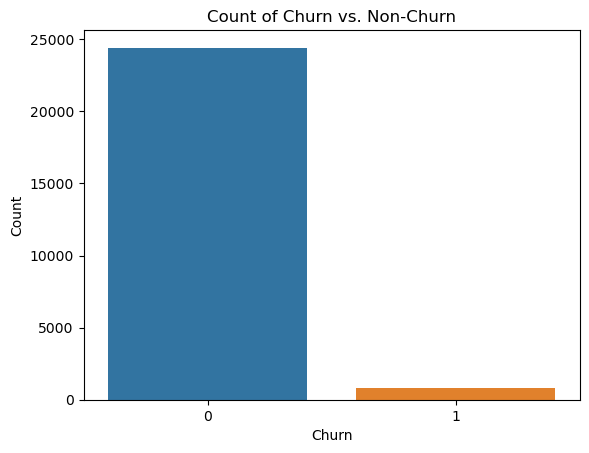

In [26]:
# Making a countplot 
sns.countplot(x='Churn', data=tc)
plt.title('Count of Churn vs. Non-Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [27]:
# As we are now going to study the churn predictors , we are now going to drop some columns
# After dropping all the attribites having "_9" corresponding to churn phase and other irrelevant columns
tc.drop(columns=[
    "arpu_9" , "onnet_mou_9" , "offnet_mou_9" , "roam_ic_mou_9" , "roam_og_mou_9" , "loc_og_t2t_mou_9" , "loc_og_t2m_mou_9",
    "loc_og_t2f_mou_9" , "loc_og_t2c_mou_9" , "loc_og_mou_9" , "std_og_t2t_mou_9" , "std_og_t2m_mou_9" , "std_og_t2f_mou_9",
    "std_og_t2c_mou_9" , "std_og_mou_9" , "isd_og_mou_9" , "spl_og_mou_9" , "og_others_9" , "total_og_mou_9" ,
    "loc_ic_t2t_mou_9" , "loc_ic_t2m_mou_9" , "loc_ic_t2f_mou_9" , "loc_ic_mou_9" , "std_ic_t2t_mou_9" , "std_ic_t2m_mou_9" ,
    "std_ic_t2f_mou_9" , "std_ic_t2o_mou_9" , "std_ic_mou_9" , "total_ic_mou_9" , "spl_ic_mou_9" , "isd_ic_mou_9" ,
    "ic_others_9" , "total_rech_num_9" , "total_rech_amt_9" , "max_rech_amt_9" , "date_of_last_rech_9" , "last_day_rch_amt_9",
    "vol_2g_mb_9" , "vol_3g_mb_9" , "monthly_2g_9" , "sachet_2g_9" , "monthly_3g_9" , "sachet_3g_9" ,
    "std_og_t2c_mou_6" , "std_og_t2c_mou_7" , "std_og_t2c_mou_8" , "std_ic_t2o_mou_6" , "std_ic_t2o_mou_7" , "std_ic_t2o_mou_8",
    "last_day_rch_amt_6" , "last_day_rch_amt_7" ,"last_day_rch_amt_8" , 
    "date_of_last_rech_6" , "date_of_last_rech_7" , "date_of_last_rech_8" ,"circle_id" , "og_others_7" , "og_others_8" ,
    "ic_others_6" , "ic_others_7" , "ic_others_8" , "circle_id"
], inplace=True)
tc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,435.4720,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,6,4,11,507,253,717,110,110,130,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0.0,349.2585,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,10,6,2,570,348,160,110,110,130,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,511,0.00,2.45,21.89,0.0,365.4220,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,97.54,0.00,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,1148.46,0.81,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,1249.53,0.81,0.00,34.54,0.00,0.00,47.41,2.31,0.00,0.00,0.00,0.00,81.96,2.31,0.00,8.63,0.00,0.00,1.28,0.00,0.00,

In [28]:
# Now we can see we have 120 columns left 
tc.shape

(25256, 120)

In [29]:
# Checking the info of the dataset for the model to be built on
tc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25256 entries, 8 to 99988
Columns: 120 entries, mobile_number to Churn
dtypes: float64(96), int32(1), int64(23)
memory usage: 23.2 MB


In [30]:
# We are finding the data set percentile in the range of 25 , 50 , 75 , 95 and 99 to find if any outliers in the data is present
tc.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
count,2.525600e+04,25256.000000,25256.00000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.00000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000
mean,7.001233e+09,612.586305,622.08890,579.790206,309.381157,322.241519,292.430466,436.739515,448.229983,409.095808,18.359231,14.159089,14.487873,30.934669,23.205048,23.615080,100.668232,103.508143,95.88713,192.281509,194.122977,183.372905,7.441390,7.629554,7.071936,1.618937,1.902972,1.813146,300.400204,305.269922,286.340893,196.629361,209.635294,187.427177,209.054429,223.098702,195.358889,2.160850,2.164356,1.920766,407.849121,434.902838,384.711002,2.155481,2.211532,2.169045,6.103733,7.712976,7.388156,0.750031,717.268624,750.155446,680.672570,72.120291,74.298577,71.698204,168.166597,171.665091,167.773503,16.634164,17.749494,16.192373,256.931174,263.723468,255.674179,16.974835,17.985371,16.491248,33.076652,35.057333,32.

In [31]:
# After checking the max value and compared it to the 99 percentile of the data set , we can see a huge difference
# So we can conclude that outliers in the data is being present 
# We will first remove the outliers as follows :

In [32]:
# We normally take datapoints in the range of 0.05 and 0.95
# But in this case , we will filter data points in the range of 0.01 and 0.99 
# So that we get required number of datapoints to build our model

def remove_outliers_percentile(tc, column):
    lower_bound = tc[column].quantile(0.01)
    upper_bound = tc[column].quantile(0.99)
    return tc[(tc[column] >= lower_bound) & (tc[column] <= upper_bound)]

# List of columns to check for outliers
columns_to_check = ["arpu_6" , "arpu_7" , "arpu_8" , "onnet_mou_6" , "onnet_mou_7" , "onnet_mou_8" , "offnet_mou_6" ,
                    "offnet_mou_7" , "offnet_mou_8" , "roam_ic_mou_6" , "roam_ic_mou_7" , "roam_ic_mou_8" ,
                    "roam_og_mou_6" , "roam_og_mou_7" , "roam_og_mou_8" , "loc_og_t2t_mou_6" , "loc_og_t2t_mou_7" ,
                    "loc_og_t2t_mou_8" , "loc_og_t2m_mou_6" , "loc_og_t2m_mou_7" , "loc_og_t2m_mou_8" , "loc_og_t2f_mou_6" ,
                    "loc_og_t2f_mou_7" , "loc_og_t2f_mou_8" , "loc_og_t2c_mou_6" , "loc_og_t2c_mou_7" ,"loc_og_t2c_mou_8" ,
                    "loc_og_mou_6" , "loc_og_mou_7" , "loc_og_mou_8" , "std_og_t2t_mou_6" , "std_og_t2t_mou_7" , 
                    "std_og_t2t_mou_8" , "std_og_t2m_mou_6" , "std_og_t2m_mou_7" , "std_og_t2m_mou_8" , "std_og_t2f_mou_6" ,
                    "std_og_t2f_mou_7" , "std_og_t2f_mou_8" ,"std_og_mou_6", "std_og_mou_7" , "std_og_mou_8", "isd_og_mou_6" ,
                    "isd_og_mou_7" , "isd_og_mou_8" , "spl_og_mou_6" ,"spl_og_mou_7" , "spl_og_mou_8" ,"og_others_6" ,
                     "total_og_mou_6" , "total_og_mou_7" ,"total_og_mou_8" , "loc_ic_t2t_mou_6" ,
                    "loc_ic_t2t_mou_7" , "loc_ic_t2t_mou_8" , "loc_ic_t2m_mou_6" , "loc_ic_t2m_mou_7" ,  "loc_ic_t2m_mou_8" ,
                    "loc_ic_t2f_mou_6" , "loc_ic_t2f_mou_7" , "loc_ic_t2f_mou_8" , "loc_ic_mou_6" , "loc_ic_mou_7" ,
                    "loc_ic_mou_8" , "std_ic_t2t_mou_6" , "std_ic_t2t_mou_7" , "std_ic_t2t_mou_8" , "std_ic_t2m_mou_6" ,
                    "std_ic_t2m_mou_7" , "std_ic_t2m_mou_8" , "std_ic_t2f_mou_6" , "std_ic_t2f_mou_7" ,"std_ic_t2f_mou_8" ,
                    "std_ic_mou_6" , "std_ic_mou_7" , "std_ic_mou_8" , "total_ic_mou_6" , "total_ic_mou_7" ,"total_ic_mou_8" ,
                    "spl_ic_mou_6" , "spl_ic_mou_7" , "spl_ic_mou_8" , "isd_ic_mou_6" , "isd_ic_mou_7" ,"isd_ic_mou_8" ,
                     "total_rech_num_6" , "total_rech_num_7" , 
                    "total_rech_num_8" , "total_rech_amt_6" , "total_rech_amt_7" , "total_rech_amt_8" , "max_rech_amt_6" ,
                    "max_rech_amt_7" , "max_rech_amt_8" ,
                    "vol_2g_mb_6" , "vol_2g_mb_7" , "vol_2g_mb_8" , "vol_3g_mb_6" , "vol_3g_mb_7" , "vol_3g_mb_8" ,
                    "monthly_2g_6" , "monthly_2g_7" , "monthly_2g_8" ,"sachet_2g_6" , "sachet_2g_7" , "sachet_2g_8",
                    "monthly_3g_6" , "monthly_3g_7", "monthly_3g_8" , "sachet_3g_6" , "sachet_3g_7" , "sachet_3g_8",
                    "aon" , "aug_vbc_3g", "jul_vbc_3g", "jun_vbc_3g" , "sep_vbc_3g" , "avg_rech_6_7" ]

# Step 1: Remove outliers for each column using the percentile method
for col in columns_to_check:
    tc = remove_outliers_percentile(tc, col) 

# Display the DataFrame without outliers
print(tc)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
tc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.0,0.0,0.00,3.26,5.91,0.0,346.81,286.01,233.38,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,87.99,151.73,82.44,364.86,381.56,294.46,0.00,0.0,0.0,0.00,0.00,0.23,10,6,2,570,348,160,110,110,130,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,511,0.0,2.45,21.89,0.0,365.4220,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.0,0.0,0.00,0.00,0.00,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,720,0.0,0.00,0.00,0.0,556.1030,0
38,7000815202,363.987,486.558,393.909,248.99,619.96,666.38,88.86,50.58,97.81,0.00,0.00,0.00,0.00,0.00,0.00,29.88,17.33,9.48,33.76,16.19,18.96,0.00,0.00,0.00,0.0,0.0,0.00,63.64,33.53,28.44,219.11,602.63,656.89,55.09,34.38,78.84,0.0,0.0,0.0,274.21,637.01,735.74,0.0,0.0,0.0,0.00,0.00,0.00,0.0,337.86,670.54,764.19,8.68,11.79,1.36,37.99,16.73,28.06,0.00,0.00,0.00,46.68,28.53,29.43,4.54,19.36,5.59,19.56,0.96,13.41,0.00,0.00,0.00,24.11,20.33,19.01,70.79,67.94,49.64,0.00,0.0,0.0,0.00,19.08,1.20,27,22,6,420,636,416,30,110,130,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1155,0.0,0.00,0.00,0.0,425.2725,0
60,7000955945,410.261,430.205,289.228,62.24,85.68,27.54,200.01,190.03,135.98,0.00,0.00,0.00,0.00,0.00,0.00,62.24,85.68,27.54,200.01,188.64,134.63,0.00,1.38,1.35,0.0,0.0,0.00,262.26,275.71,163.53,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,262.26,275.71,163.53,71.71,43.03,27.84,212.14,259.91,145.48,0.46,0.00,2.43,284.33,302.94,175.76,0.00,0.00,0.00,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.31,0.00,291.26,30

In [34]:
# After removing the outlier , we will run a check again .
# We can see that there are now minimum outliers present in the dataset
tc.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
count,6.574000e+03,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.00000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000
mean,7.001256e+09,474.880415,462.401124,419.612956,219.620356,212.903103,188.516457,335.932012,333.009119,293.874957,7.104457,3.510313,4.256145,13.109480,6.480890,7.798637,72.397697,70.205589,63.450044,171.550529,172.519483,157.969522,4.791885,4.745278,4.270219,0.860494,0.925750,0.882600,248.749568,247.480033,225.699162,142.185427,140.051386,121.902014,147.918613,148.617536,123.974060,0.728371,0.570642,0.482773,290.83674,289.243855,246.362873,0.103702,0.074186,0.036831,3.397493,4.173120,3.903733,0.506815,543.604084,540.987765,476.038503,52.478316,51.626552,48.484106,136.167268,135.858998,130.193672,9.940526,9.994305,9.072543,198.596800,197.490646,187.760776,7.573782,7.608097,6.376749,16.499998,16.493347,14.525844,0.905227,0.862849,0.732137,24.982822,24.968089,21.638290,226.583342,225.635964,212.201287,0.065079,0.007601,0.021334,2.2509

In [35]:

# Now we have around 6500 rows left for training and testing the model 
tc.shape

(6574, 120)

In [36]:
# As we can see , we have more number of columns , and we need to make some derive features from the given column names .
# Following are the derived features , that we made to make our analysis best.

# Avg Recharge Amount across months

tc['avg_rech_amt'] = (tc['total_rech_amt_6'] + tc['total_rech_amt_7'] + tc['total_rech_amt_8']) / 3

# Average 2G data usage across the three months
tc['avg_2g_usage'] = (tc['vol_2g_mb_6'] + tc['vol_2g_mb_7'] + tc['vol_2g_mb_8']) / 3

# Average 3G data usage across the three months
tc['avg_3g_usage'] = (tc['vol_3g_mb_6'] + tc['vol_3g_mb_7'] + tc['vol_3g_mb_8']) / 3

# Average STD outgoing minutes across the three months
tc['avg_std_og_mou'] = (tc['std_og_mou_6'] + tc['std_og_mou_7'] + tc['std_og_mou_8']) / 3

# Average Local outgoing minutes across the three months
tc['avg_loc_og_mou'] = (tc['loc_og_mou_6'] + tc['loc_og_mou_7'] + tc['loc_og_mou_8']) / 3

# Average Incoming voice minutes across the three months
tc['avg_ic_mou_loc'] = (tc['loc_ic_mou_6'] + tc['loc_ic_mou_7'] + tc['loc_ic_mou_8']) / 3


# Roaming Minutes (Roam IC + Roam OG)
tc['avg_roaming_ic_mou'] = (tc['roam_ic_mou_6'] + tc['roam_ic_mou_7'] + tc['roam_ic_mou_8']) / 3

tc['avg_roaming_og_mou'] = (tc['roam_og_mou_6'] + tc['roam_og_mou_7'] + tc['roam_og_mou_8']) / 3




tc['arpu_avg'] = tc[['arpu_6', 'arpu_7', 'arpu_8']].mean(axis=1)
tc['onnet_mou_avg'] = tc[['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']].mean(axis=1)
tc['offnet_mou_avg'] = tc[['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']].mean(axis=1)
tc['loc_og_t2t_mou_avg'] = tc[['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8']].mean(axis=1)
# Add similar lines for all other features


# Average for loc_og_t2m_mou
tc['loc_og_t2m_mou_avg'] = tc[['loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8']].mean(axis=1)

# Average for loc_og_t2f_mou
tc['loc_og_t2f_mou_avg'] = tc[['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8']].mean(axis=1)

# Average for loc_og_t2c_mou
tc['loc_og_t2c_mou_avg'] = tc[['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8']].mean(axis=1)

# Average for std_og_t2t_mou
tc['std_og_t2t_mou_avg'] = tc[['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8']].mean(axis=1)

# Average for std_og_t2m_mou
tc['std_og_t2m_mou_avg'] = tc[['std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8']].mean(axis=1)

# Average for std_og_t2f_mou
tc['std_og_t2f_mou_avg'] = tc[['std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8']].mean(axis=1)

# Average for isd_og_mou
tc['isd_og_mou_avg'] = tc[['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8']].mean(axis=1)

# Average for spl_og_mou
tc['spl_og_mou_avg'] = tc[['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8']].mean(axis=1)

# Average for loc_ic_t2t_mou
tc['loc_ic_t2t_mou_avg'] = tc[['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8']].mean(axis=1)

# Average for loc_ic_t2m_mou
tc['loc_ic_t2m_mou_avg'] = tc[['loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8']].mean(axis=1)

# Average for loc_ic_t2f_mou
tc['loc_ic_t2f_mou_avg'] = tc[['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']].mean(axis=1)

# Average for loc_ic_mou
tc['loc_ic_mou_avg'] = tc[['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']].mean(axis=1)

# Average for std_ic_t2t_mou
tc['std_ic_t2t_mou_avg'] = tc[['std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8']].mean(axis=1)

# Average for std_ic_t2m_mou
tc['std_ic_t2m_mou_avg'] = tc[['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8']].mean(axis=1)

# Average for std_ic_t2f_mou
tc['std_ic_t2f_mou_avg'] = tc[['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8']].mean(axis=1)

# Average for std_ic_mou
tc['std_ic_mou_avg'] = tc[['std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8']].mean(axis=1)

tc['spl_ic_mou_avg'] = tc[['spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8']].mean(axis=1)

# Average for isd_ic_mou
tc['isd_ic_mou_avg'] = tc[['isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8']].mean(axis=1)

# Average for max_rech_amt
tc['max_rech_amt_avg'] = tc[['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']].mean(axis=1)

# Average for monthly_2g
tc['monthly_2g_avg'] = tc[['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']].mean(axis=1)

# Average for sachet_2g
tc['sachet_2g_avg'] = tc[['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']].mean(axis=1)

# Average for monthly_3g
tc['monthly_3g_avg'] = tc[['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']].mean(axis=1)

# Average for sachet_3g
tc['sachet_3g_avg'] = tc[['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']].mean(axis=1)

#  average recharge numbers across the three months
tc['total_rech_num_avg'] = (tc['total_rech_num_6'] + tc['total_rech_num_7'] + tc['total_rech_num_8']) / 3

In [37]:
# Dropping the columns for which we have derived features and that are no longer needed
tc.drop(columns = ["total_og_mou_6" , "total_og_mou_7" , "total_og_mou_8" , "total_ic_mou_6" , "total_ic_mou_7" ,
                  "total_ic_mou_8" , "total_rech_amt_6" , "total_rech_amt_7" , "total_rech_amt_8" , 
                  "vol_2g_mb_6" ,"vol_2g_mb_7" , "vol_2g_mb_8" , "vol_3g_mb_6" , "vol_3g_mb_7" , "vol_3g_mb_8" ,
                  "roam_ic_mou_6" , "roam_ic_mou_7" , "roam_ic_mou_8" ,"roam_og_mou_6", "roam_og_mou_7" ,
                  "roam_og_mou_8" , "loc_og_mou_6" , "loc_og_mou_7" , "loc_og_mou_8" , "std_og_mou_6" ,
                  "std_og_mou_7" , "std_og_mou_8" , "arpu_6" ,"arpu_7" ,"arpu_8" , "onnet_mou_6" ,"onnet_mou_7",
                  "onnet_mou_8", "offnet_mou_6" , "offnet_mou_7" , "offnet_mou_8" , "loc_og_t2t_mou_6" ,
                  "loc_og_t2t_mou_7" , "loc_og_t2t_mou_8" ,"loc_og_t2m_mou_6" ,"loc_og_t2m_mou_7" ,
                  "loc_og_t2m_mou_8" , "loc_og_t2f_mou_6" ,"loc_og_t2f_mou_7" ,"loc_og_t2f_mou_8" ,
                  "loc_og_t2c_mou_6" ,"loc_og_t2c_mou_7" ,"loc_og_t2c_mou_8" ,"std_og_t2t_mou_6" ,
                  "std_og_t2t_mou_7" ,"std_og_t2t_mou_8" ,"std_og_t2m_mou_6" ,"std_og_t2m_mou_7" ,"std_og_t2m_mou_8" ,
                  "std_og_t2f_mou_6" ,"std_og_t2f_mou_7" ,"std_og_t2f_mou_8" ,"isd_og_mou_6" ,"isd_og_mou_7" ,
                  "isd_og_mou_8" ,"spl_og_mou_6" ,"spl_og_mou_7" ,"spl_og_mou_8" ,"loc_ic_t2t_mou_6" ,
                  "loc_ic_t2t_mou_7" ,"loc_ic_t2t_mou_8" , "loc_ic_t2m_mou_6" ,"loc_ic_t2m_mou_7" ,
                  "loc_ic_t2m_mou_8" , "loc_ic_t2f_mou_6" ,"loc_ic_t2f_mou_7" ,"loc_ic_t2f_mou_8" ,
                  "loc_ic_mou_6" , "loc_ic_mou_7" ,"loc_ic_mou_8" , "std_ic_t2t_mou_6" ,"std_ic_t2t_mou_7" ,
                  "std_ic_t2t_mou_8" , "std_ic_t2m_mou_6" ,"std_ic_t2m_mou_7" ,"std_ic_t2m_mou_8" ,
                  "std_ic_t2f_mou_6" , "std_ic_t2f_mou_7" , "std_ic_t2f_mou_8" , "std_ic_mou_6" ,"std_ic_mou_7" ,
                  "std_ic_mou_8" ,"spl_ic_mou_6" , "spl_ic_mou_7" , "spl_ic_mou_8" , "isd_ic_mou_6" ,
                  "isd_ic_mou_7" ,"isd_ic_mou_8" , "max_rech_amt_6" ,"max_rech_amt_7" ,
                  "max_rech_amt_8" ,"monthly_2g_6" ,"monthly_2g_7" ,"monthly_2g_8" ,"sachet_2g_6" ,"sachet_2g_7" ,
                  "sachet_2g_8" ,"monthly_3g_6" ,"monthly_3g_7" ,"monthly_3g_8" , "sachet_3g_6" ,
                  "sachet_3g_7" ,"sachet_3g_8"  ,"og_others_6" , "total_rech_num_6" ,"total_rech_num_7" ,
                  "total_rech_num_8"] , inplace=True)
tc.head()

,mobile_number,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn,avg_rech_amt,avg_2g_usage,avg_3g_usage,avg_std_og_mou,avg_loc_og_mou,avg_ic_mou_loc,avg_roaming_ic_mou,avg_roaming_og_mou,arpu_avg,onnet_mou_avg,offnet_mou_avg,loc_og_t2t_mou_avg,loc_og_t2m_mou_avg,loc_og_t2f_mou_avg,loc_og_t2c_mou_avg,std_og_t2t_mou_avg,std_og_t2m_mou_avg,std_og_t2f_mou_avg,isd_og_mou_avg,spl_og_mou_avg,loc_ic_t2t_mou_avg,loc_ic_t2m_mou_avg,loc_ic_t2f_mou_avg,loc_ic_mou_avg,std_ic_t2t_mou_avg,std_ic_t2m_mou_avg,std_ic_t2f_mou_avg,std_ic_mou_avg,spl_ic_mou_avg,isd_ic_mou_avg,max_rech_amt_avg,monthly_2g_avg,sachet_2g_avg,monthly_3g_avg,sachet_3g_avg,total_rech_num_avg
16,7000875565,511,0.0,2.45,21.89,0.0,365.4220,0,359.333333,0.0,0.0,39.836667,245.826667,239.490000,0.943333,5.913333,306.246000,65.043333,229.596667,58.383333,182.520000,4.913333,0.000000,4.566667,35.263333,0.0,0.0,3.056667,47.220000,175.553333,16.700000,239.490000,51.253333,55.230000,0.896667,107.386667,0.000000,0.076667,116.666667,0.0,0.0,0.0,0.0,6.000000
21,7002124215,720,0.0,0.00,0.00,0.0,556.1030,0,666.000000,0.0,0.0,878.923333,106.956667,124.040000,0.000000,0.000000,583.322000,106.553333,879.333333,11.326667,94.850000,0.776667,0.000000,95.220000,783.696667,0.0,0.0,0.000000,10.736667,107.340000,5.946667,124.040000,6.740000,69.220000,0.000000,75.966667,0.000000,0.000000,50.000000,0.0,0.0,0.0,0.0,25.000000
38,7000815202,1155,0.0,0.00,0.00,0.0,425.2725,0,490.666667,0.0,0.0,548.986667,41.870000,34.880000,0.000000,0.000000,414.818000,511.776667,79.083333,18.896667,22.970000,0.000000,0.000000,492.876667,56.103333,0.0,0.0,0.000000,7.276667,27.593333,0.000000,34.880000,9.830000,11.310000,0.000000,21.150000,0.000000,6.760000,90.000000,0.0,0.0,0.0,0.0,18.333333
60,7000955945,3292,0.0,0.00,0.00,0.0,420.2330,0,431.666667,0.0,0.0,0.000000,233.833333,254.343333,0.000000,0.000000,376.564667,58.486667,175.340000,58.486667,174.426667,0.910000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,47.526667,205.843333,0.963333,254.343333,0.000000,0.103333,0.000000,0.103333,0.000000,0.160000,71.666667,0.0,0.0,0.0,0.0,8.000000
74,7001532600,444,0.0,0.00,0.00,0.0,353.4190,0,417.000000,0.0,0.0,536.096667,58.590000,78.103333,4.936667,14.656667,352.399333,522.706667,86.573333,28.426667,30.153333,0.000000,0.003333,482.530000,53.556667,0.0,0.0,1.323333,24.016667,52.546667,1.530000,78.103333,6.410000,25.226667,0.620000,32.266667,0.093333,0.000000,129.333333,0.0,0.0,0.0,0.0,10.000000


In [38]:
# Now we have only 44 columns left 
tc.shape

(6574, 44)

mobile_number


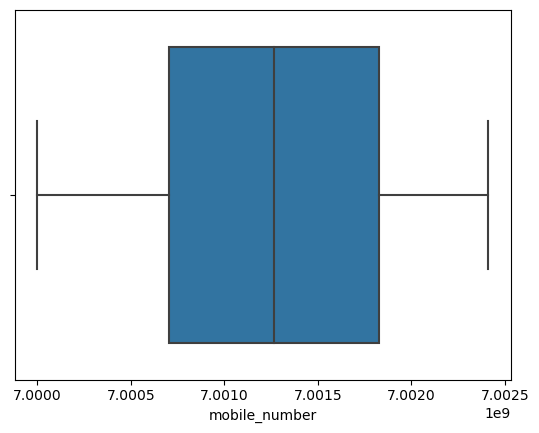

aon


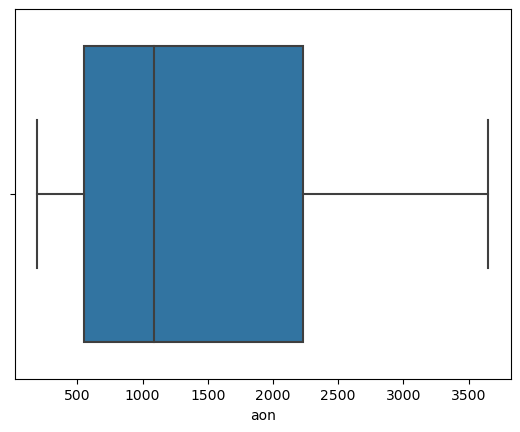

aug_vbc_3g


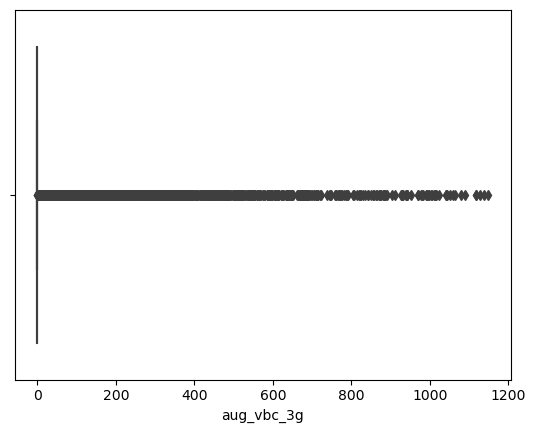

jul_vbc_3g


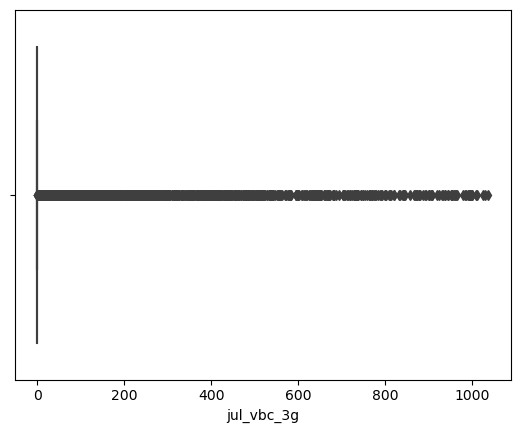

jun_vbc_3g


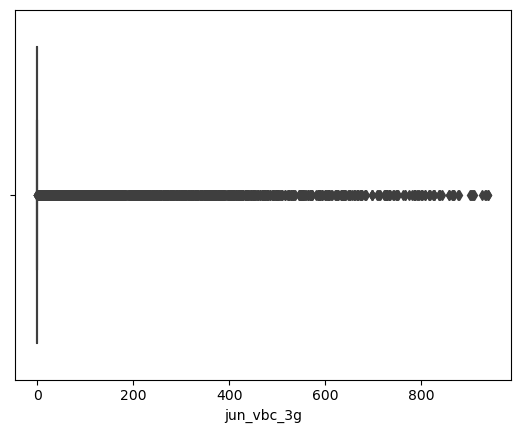

sep_vbc_3g


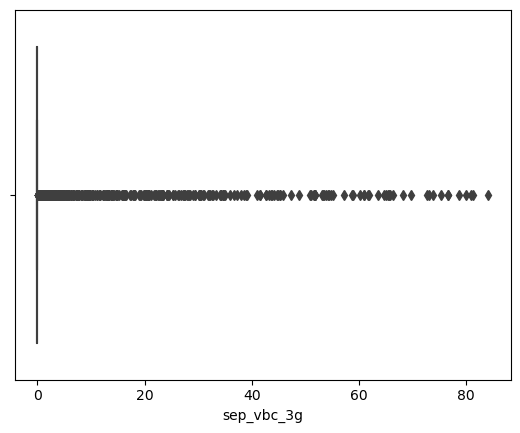

avg_rech_6_7


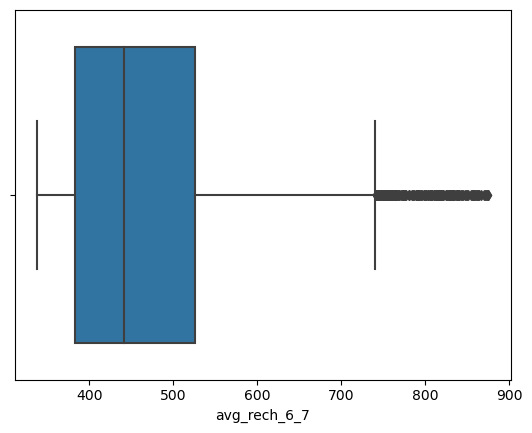

Churn


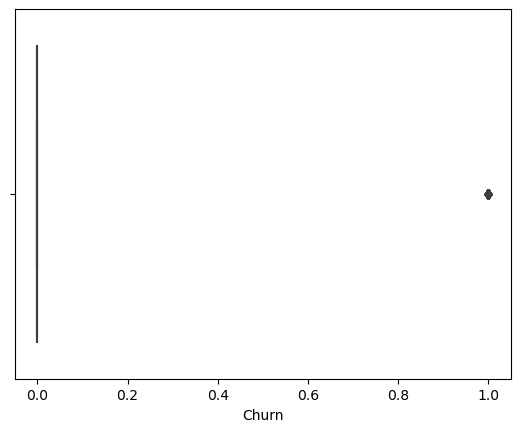

avg_rech_amt


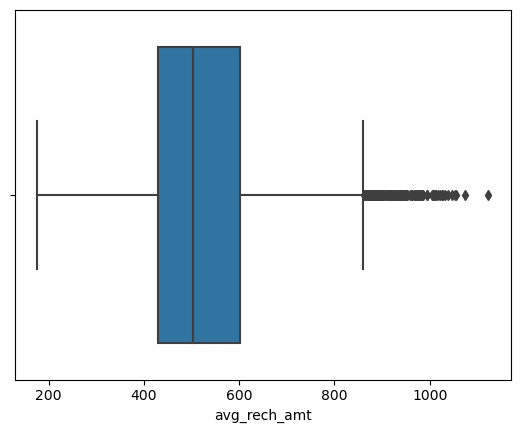

avg_2g_usage


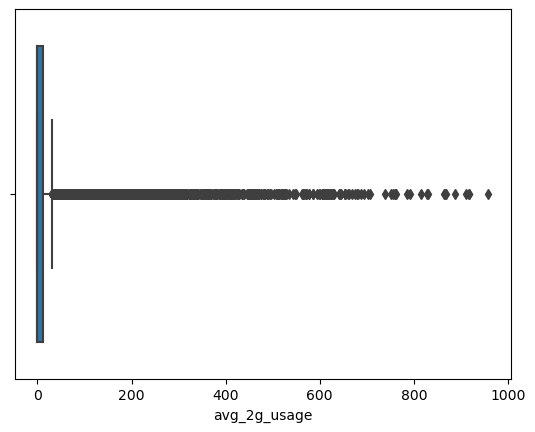

avg_3g_usage


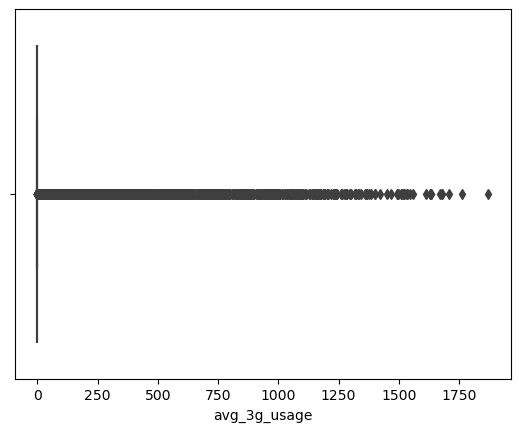

avg_std_og_mou


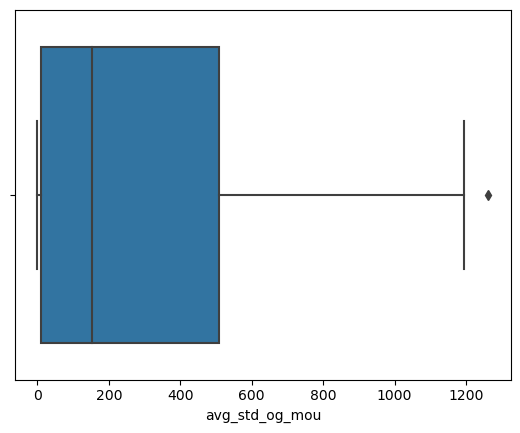

avg_loc_og_mou


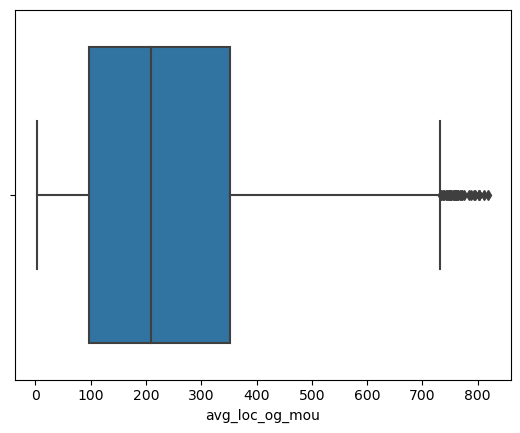

avg_ic_mou_loc


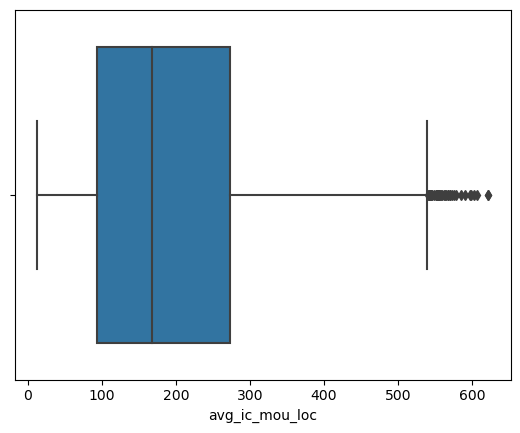

avg_roaming_ic_mou


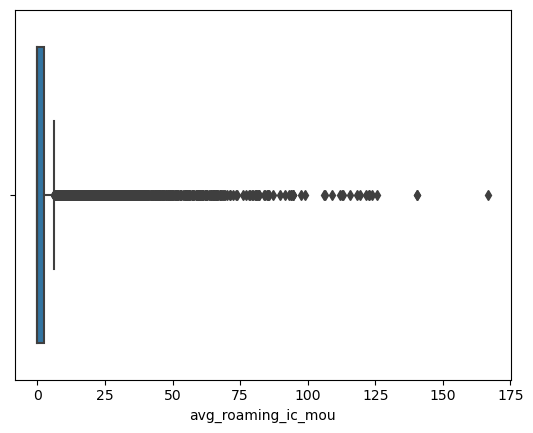

avg_roaming_og_mou


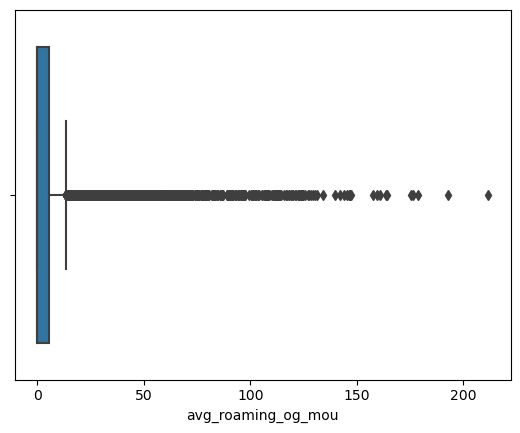

arpu_avg


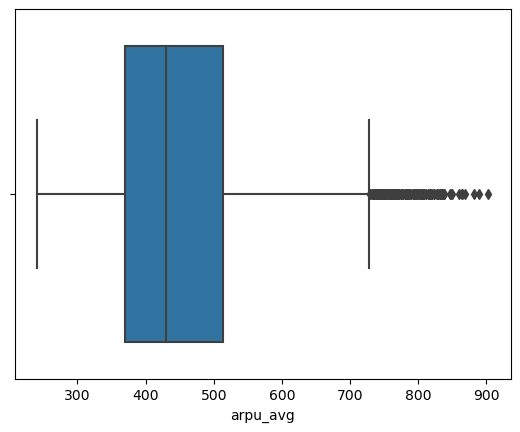

onnet_mou_avg


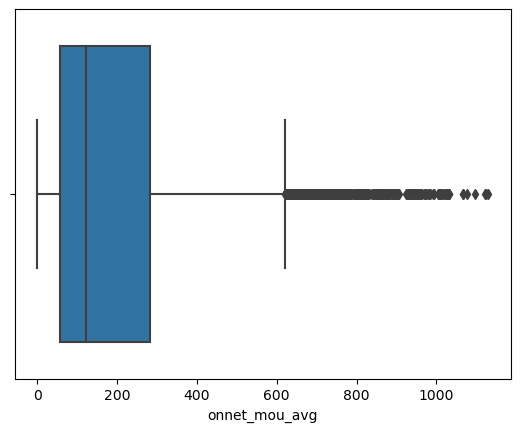

offnet_mou_avg


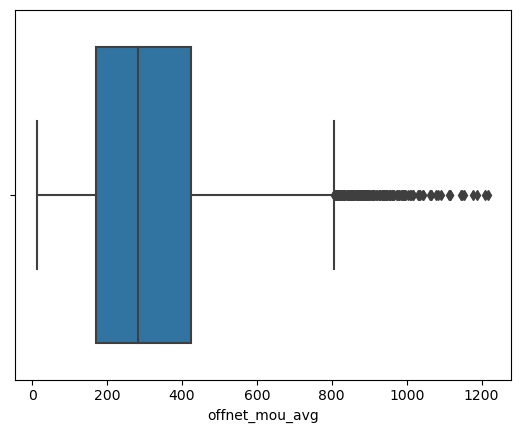

loc_og_t2t_mou_avg


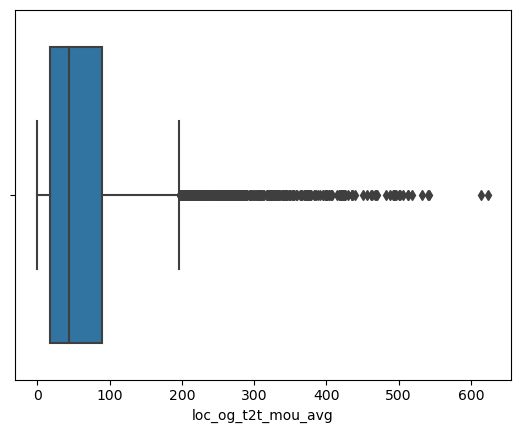

loc_og_t2m_mou_avg


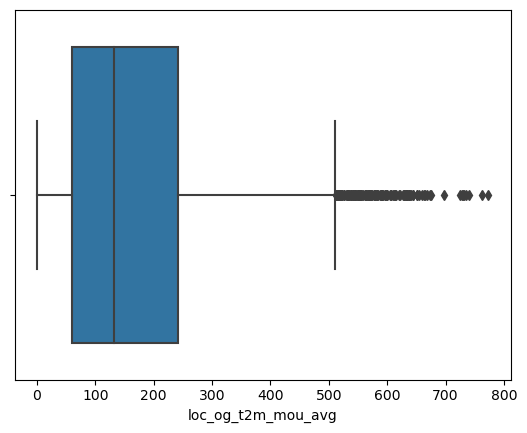

loc_og_t2f_mou_avg


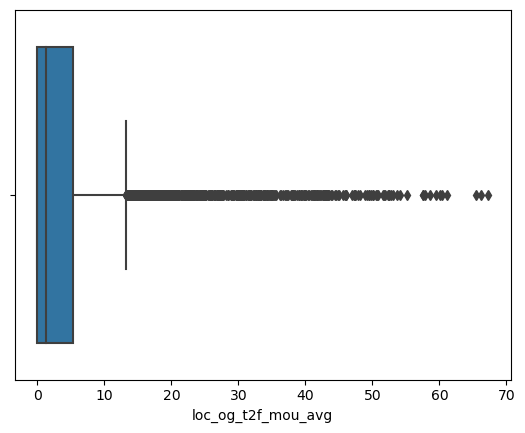

loc_og_t2c_mou_avg


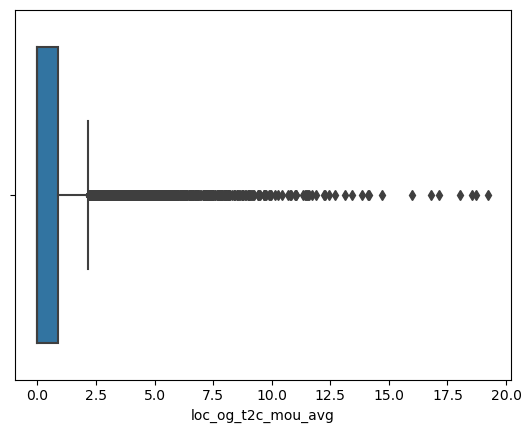

std_og_t2t_mou_avg


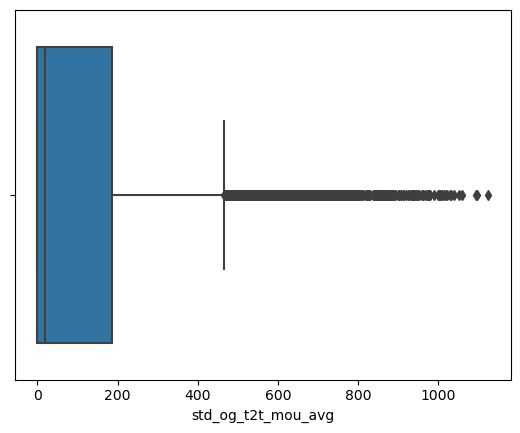

std_og_t2m_mou_avg


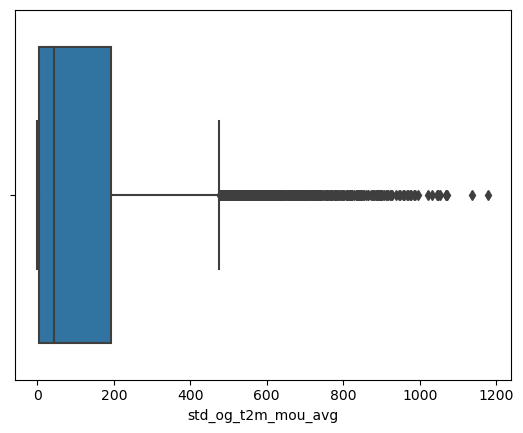

std_og_t2f_mou_avg


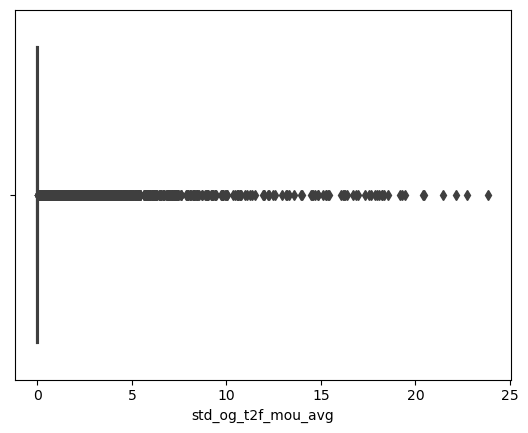

isd_og_mou_avg


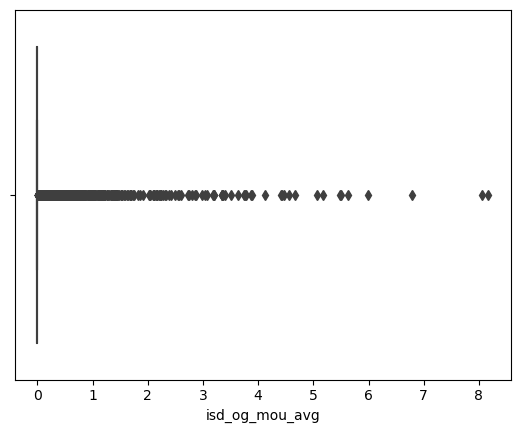

spl_og_mou_avg


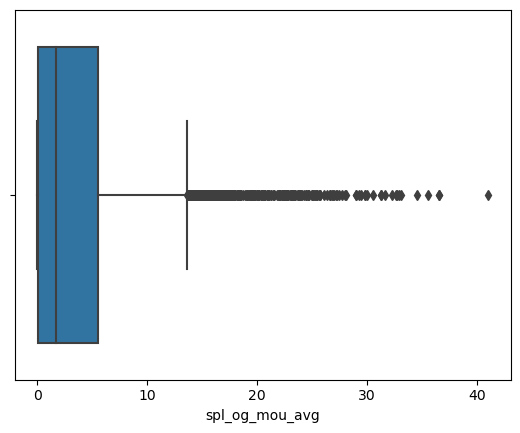

loc_ic_t2t_mou_avg


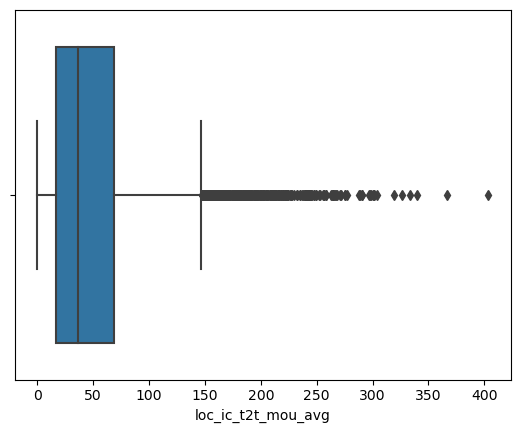

loc_ic_t2m_mou_avg


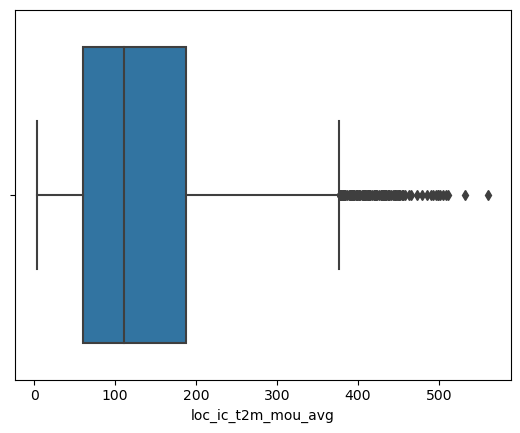

loc_ic_t2f_mou_avg


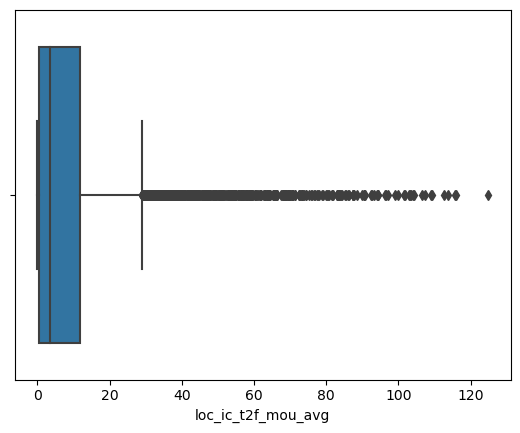

loc_ic_mou_avg


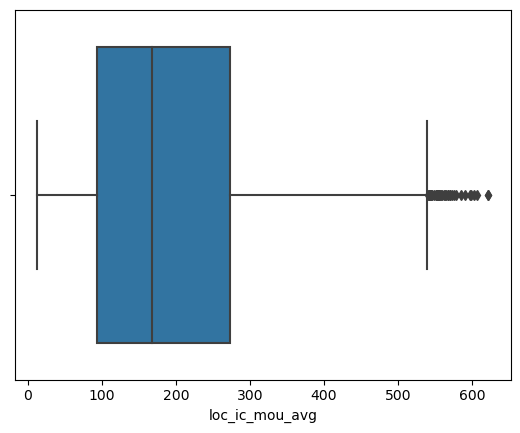

std_ic_t2t_mou_avg


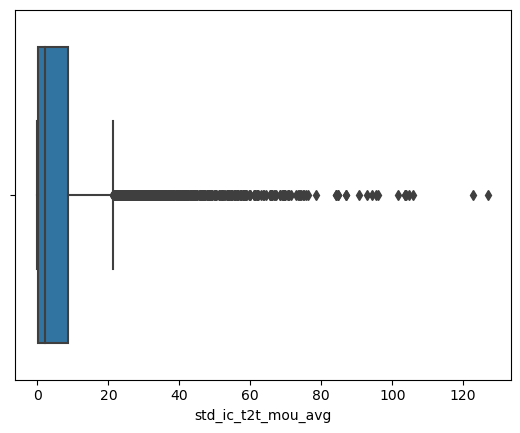

std_ic_t2m_mou_avg


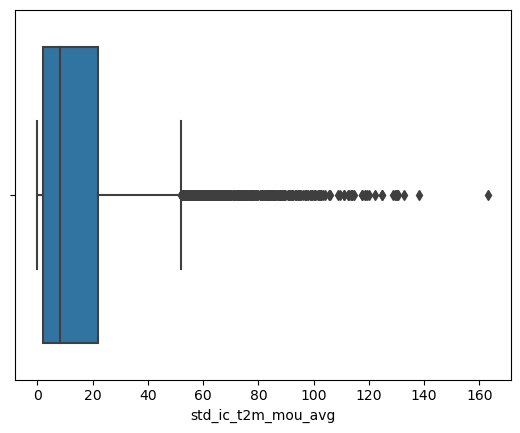

std_ic_t2f_mou_avg


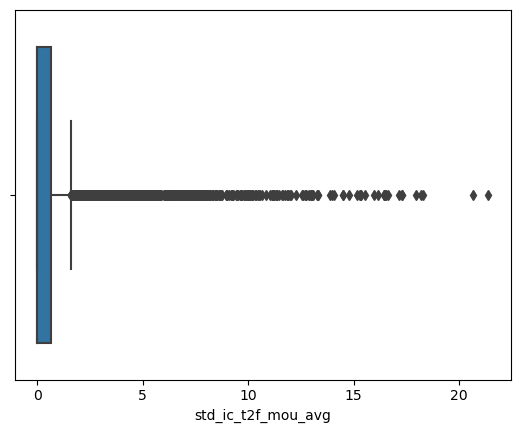

std_ic_mou_avg


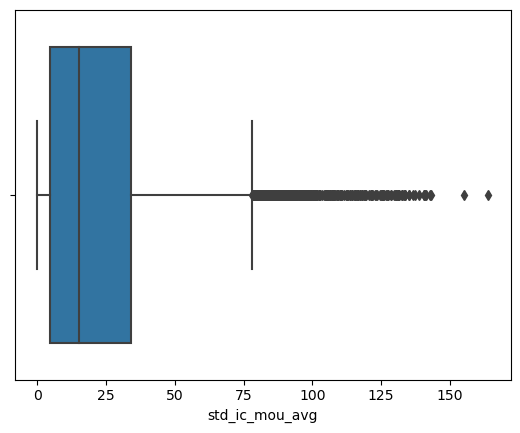

spl_ic_mou_avg


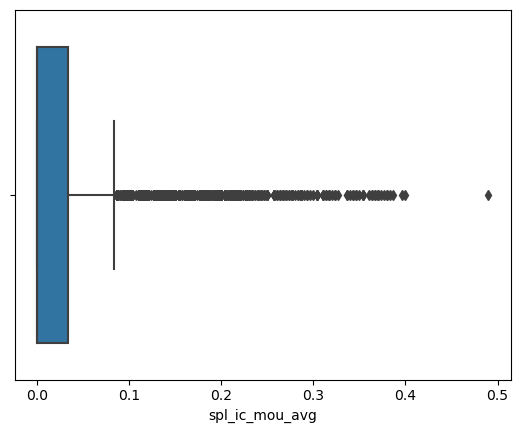

isd_ic_mou_avg


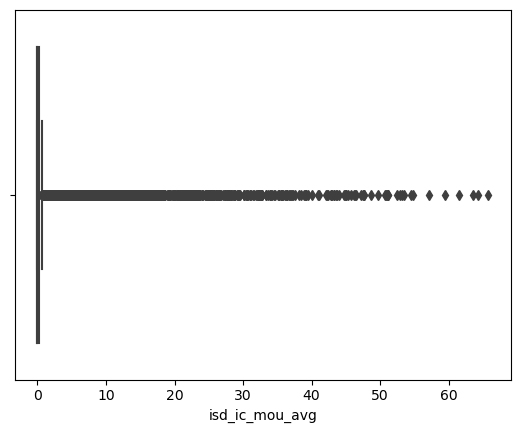

max_rech_amt_avg


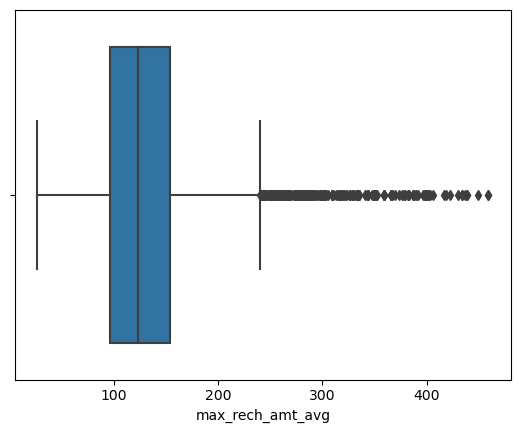

monthly_2g_avg


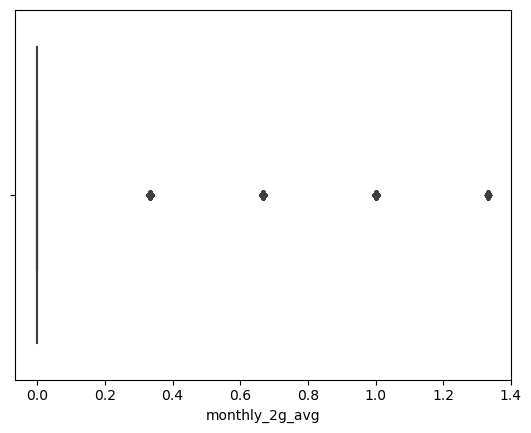

sachet_2g_avg


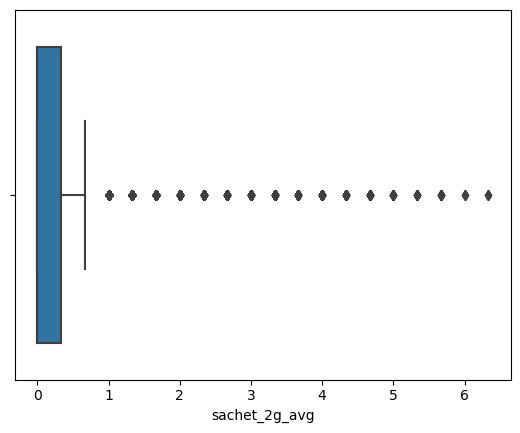

monthly_3g_avg


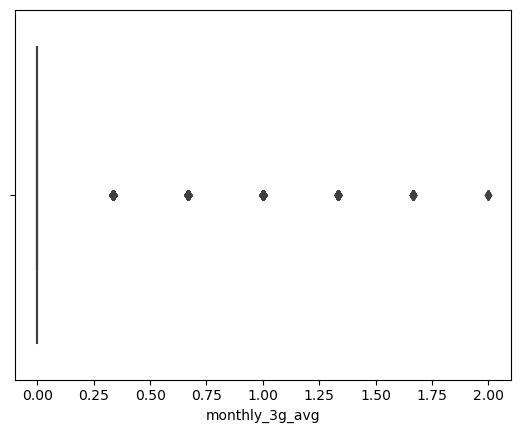

sachet_3g_avg


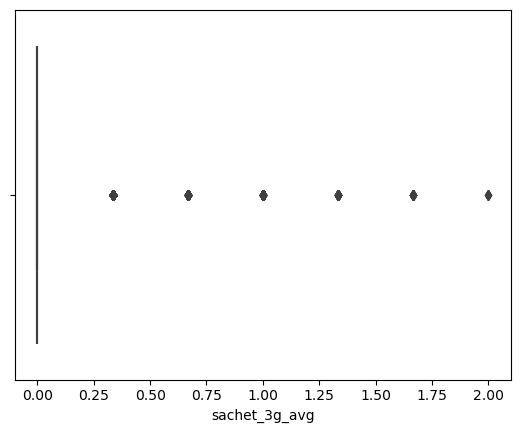

total_rech_num_avg


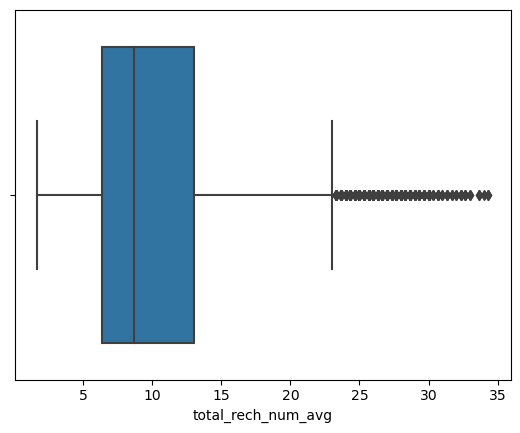

In [39]:
for i in tc.columns:
    print(i)  # Prints the column name
    sns.boxplot(x=tc[i])  # Creates a boxplot for the column 'i'
    plt.show()  # Displays the plot


In [40]:
# Now we can check the outliers present in the derived columns features 
# We can see that in some columns , there are not outliers and some columns the presence of few outliers will not effect
# our analysis much.
tc.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,mobile_number,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn,avg_rech_amt,avg_2g_usage,avg_3g_usage,avg_std_og_mou,avg_loc_og_mou,avg_ic_mou_loc,avg_roaming_ic_mou,avg_roaming_og_mou,arpu_avg,onnet_mou_avg,offnet_mou_avg,loc_og_t2t_mou_avg,loc_og_t2m_mou_avg,loc_og_t2f_mou_avg,loc_og_t2c_mou_avg,std_og_t2t_mou_avg,std_og_t2m_mou_avg,std_og_t2f_mou_avg,isd_og_mou_avg,spl_og_mou_avg,loc_ic_t2t_mou_avg,loc_ic_t2m_mou_avg,loc_ic_t2f_mou_avg,loc_ic_mou_avg,std_ic_t2t_mou_avg,std_ic_t2m_mou_avg,std_ic_t2f_mou_avg,std_ic_mou_avg,spl_ic_mou_avg,isd_ic_mou_avg,max_rech_amt_avg,monthly_2g_avg,sachet_2g_avg,monthly_3g_avg,sachet_3g_avg,total_rech_num_avg
count,6.574000e+03,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000
mean,7.001256e+09,1389.784302,51.372619,49.948511,44.838153,1.055583,468.640769,0.022969,527.741456,38.909595,106.897012,275.481156,240.642921,194.616074,4.956972,9.129669,452.298165,207.013305,320.938696,68.684443,167.346512,4.602461,0.889615,134.712942,140.170069,0.593929,0.071573,3.824782,50.862991,134.073313,9.669125,194.616074,7.186209,15.839730,0.833404,23.863067,0.031338,2.281529,133.990214,0.097303,0.420039,0.085184,0.051364,10.331356
std,6.645012e+05,979.236345,154.706262,152.399697,137.100932,6.471956,109.620566,0.149817,133.329825,107.072925,262.365399,298.921137,170.079275,123.578567,13.345661,21.718263,109.961658,213.291415,199.961813,76.374764,132.985722,8.205860,1.867165,215.128756,201.325414,1.989402,0.395041,5.232452,48.557008,93.775327,15.484739,123.578567,12.438686,20.053773,2.033403,26.017171,0.063523,6.767814,64.566137,0.257315,0.949662,0.264757,0.193235,5.668074
min,7.000000e+09,193.000000,0.000000,0.000000,0.000000,0.000000,338.145500,0.000000,176.333333,0.000000,0.000000,0.000000,3.556667,12.956667,0.000000,0.000000,241.299000,0.000000,13.920000,0.000000,0.723333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.016667,0.000000,12.956667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.666667,0.000000,0.000000,0.000000,0.000000,1.666667
25%,7.000705e+09,548.000000,0.000000,0.000000,0.000000,0.000000,382.477125,0.000000,429.666667,0.000000,0.000000,8.973333,97.725000,93.906667,0.000000,0.000000,370.321417,55.951667,170.686667,18.035833,60.262500,0.000000,0.000000,0.110000,4.751667,0.000000,0.000000,0.087500,16.743333,60.236667,0.573333,93.906667,0.063333,1.944167,0.000000,4.707500,0.000000,0.000000,96.666667,0.000000,0.000000,0.000000,0.000000,6.333333
50%,7.001267e+09,1089.500000,0.000000,0.000000,0.000000,0.000000,440.755500,0.000000,502.666667,0.000000,0.000000,151.460000,209.373333,168.401667,0.000000,0.000000,430.500667,122.983333,282.106667,43.573333,132.433333,1.215000,0.000000,18.790000,43.716667,0.000000,0.000000,1.716667,36.351667,110.963333,3.436667,168.401667,2.166667,8.251667,0.000000,15.133333,0.000000,0.000000,123.333333,0.000000,0.000000,0.000000,0.000000,8.666667
75%,7.001826e+09,2226.250000,0.000000,0.000000,0.000000,0.000000,525.439500,0.000000,602.333333,12.762500,0.000000,507.750833,351.660000,272.519167,2.475833,5.291667,513.599083,281.991667,425.109167,89.764167,240.729167,5.311667,0.870000,186.179167,193.698333,0.020000,0.000000,5.502500,68.975000,187.063333,11.896667,272.519167,8.565000,21.970000,0.633333,34.058333,0.033333,0.249167,154.000000,0.000000,0.333333,0.000000,0.000000,13.000000
90%,7.002164e+09,2935.000000,177.348000,160.826000,146.344000,0.000000,627.992950,0.000000,713.566667,121.283667,448.759333,734.368667,488.726000,377.051667,15.531667,33.360000,6

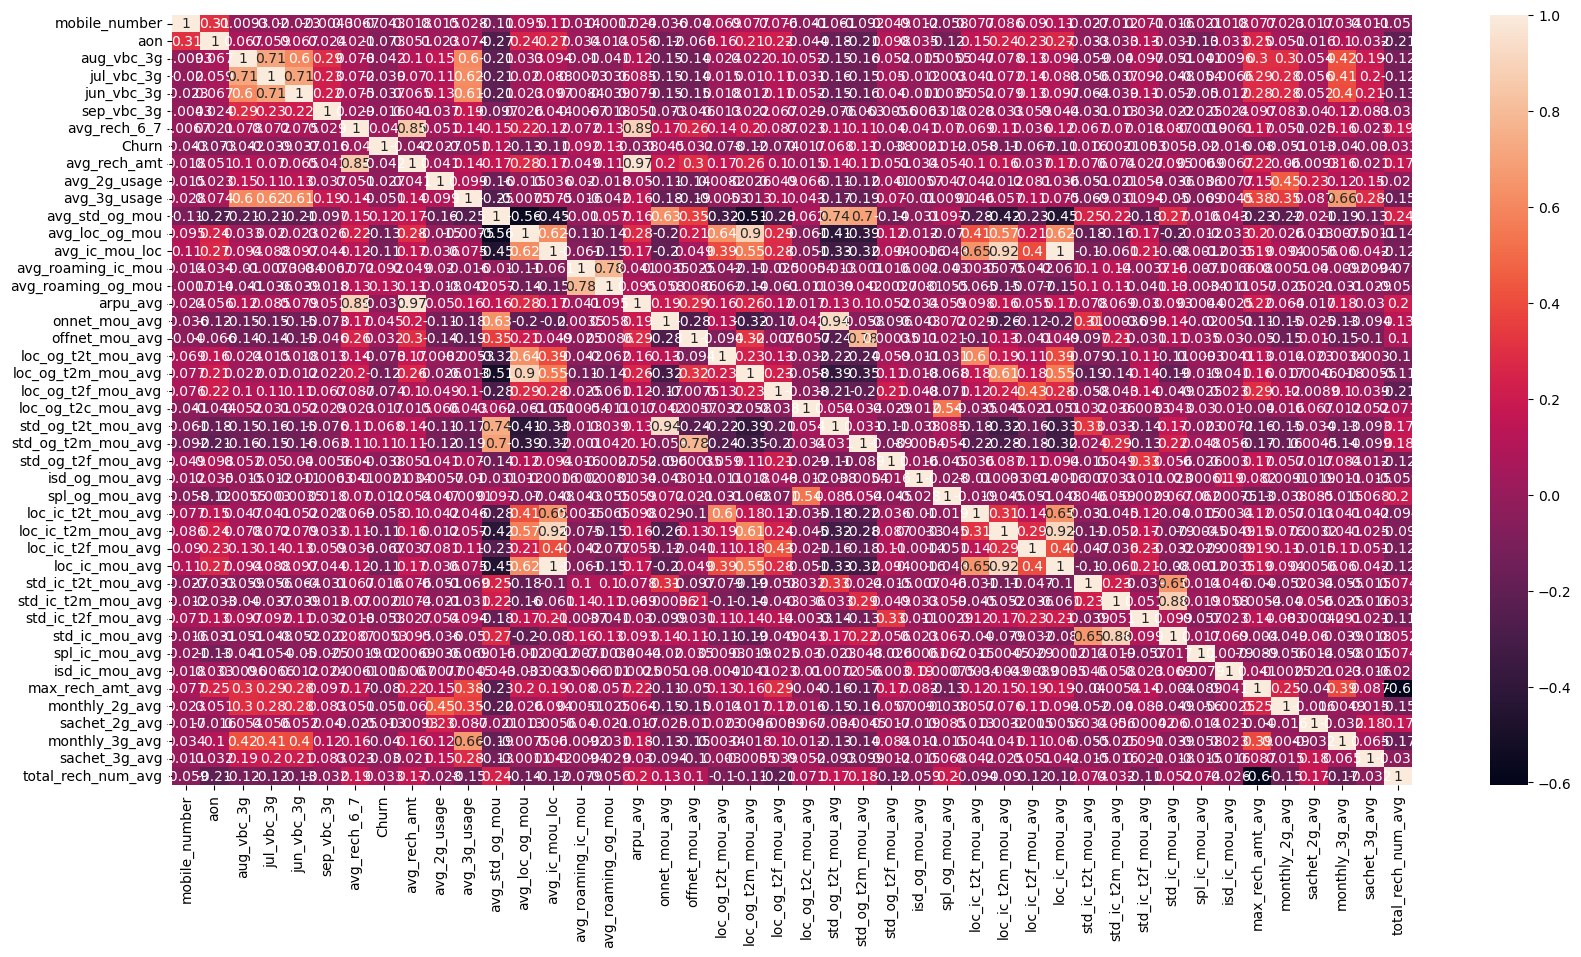

In [41]:
# We are now finding a correlation between the derived columns and see whether there is presencce of the multicollinearity
# For finding the correlation , for that we are now plotting a heatmap
plt.figure(figsize = (20,10))        
sns.heatmap(tc.corr(),annot = True)
plt.show()

### Looking At The Correlation Matrix

In [42]:
# For more we can also make a correlation matrix 
# To analyse dataset having more number of columns 
correlation_matrix = tc.corr()
correlation_matrix


,mobile_number,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn,avg_rech_amt,avg_2g_usage,avg_3g_usage,avg_std_og_mou,avg_loc_og_mou,avg_ic_mou_loc,avg_roaming_ic_mou,avg_roaming_og_mou,arpu_avg,onnet_mou_avg,offnet_mou_avg,loc_og_t2t_mou_avg,loc_og_t2m_mou_avg,loc_og_t2f_mou_avg,loc_og_t2c_mou_avg,std_og_t2t_mou_avg,std_og_t2m_mou_avg,std_og_t2f_mou_avg,isd_og_mou_avg,spl_og_mou_avg,loc_ic_t2t_mou_avg,loc_ic_t2m_mou_avg,loc_ic_t2f_mou_avg,loc_ic_mou_avg,std_ic_t2t_mou_avg,std_ic_t2m_mou_avg,std_ic_t2f_mou_avg,std_ic_mou_avg,spl_ic_mou_avg,isd_ic_mou_avg,max_rech_amt_avg,monthly_2g_avg,sachet_2g_avg,monthly_3g_avg,sachet_3g_avg,total_rech_num_avg
mobile_number,1.000000,0.307678,-0.009304,-0.019561,-0.022572,-0.004287,0.006674,-0.043335,0.017791,0.014909,0.027731,-0.105560,0.094805,0.106868,0.014009,-0.001663,0.024325,-0.036312,-0.039569,0.068784,0.077061,0.075880,-0.040765,-0.060815,-0.092231,0.049132,0.011556,-0.057636,0.077178,0.086080,0.089541,0.106868,-0.026647,-0.011871,0.070680,-0.016364,-0.021302,0.018235,0.076563,0.023220,0.016768,0.034143,0.010749,-0.058701
aon,0.307678,1.000000,0.067223,0.058901,0.067490,0.023912,0.020802,-0.072864,0.051406,0.022655,0.073510,-0.270874,0.244621,0.268116,0.033554,0.013784,0.056347,-0.122449,-0.066324,0.156123,0.209642,0.219454,-0.043831,-0.177370,-0.213619,0.097945,0.034804,-0.122599,0.151981,0.236889,0.228505,0.268116,-0.033324,-0.032797,0.132959,-0.030817,-0.132224,0.032936,0.252788,0.051098,-0.015871,0.103712,0.031512,-0.211015
aug_vbc_3g,-0.009304,0.067223,1.000000,0.714352,0.602709,0.287074,0.077970,-0.042366,0.103932,0.154745,0.600262,-0.212406,0.032856,0.093711,-0.009997,-0.040613,0.119032,-0.145148,-0.138470,0.023695,0.022255,0.099749,0.052262,-0.150541,-0.155019,0.051761,-0.015350,0.005531,0.046788,0.077664,0.130803,0.093711,-0.058855,-0.039698,0.096811,-0.051177,-0.041376,0.009565,0.299413,0.297645,0.053629,0.420388,0.188904,-0.117411
jul_vbc_3g,-0.019561,0.058901,0.714352,1.000000,0.708689,0.226235,0.072152,-0.038546,0.069913,0.114230,0.617866,-0.213118,0.020236,0.087574,-0.007290,-0.035923,0.085220,-0.153587,-0.140745,0.014606,0.010490,0.113424,0.031080,-0.155978,-0.150250,0.049929,-0.012464,0.002954,0.041401,0.071533,0.135851,0.087574,-0.056291,-0.037193,0.092076,-0.048391,-0.054163,0.006568,0.286555,0.277165,0.056388,0.406753,0.202929,-0.124674
jun_vbc_3g,-0.022572,0.067490,0.602709,0.708689,1.000000,0.219793,0.075108,-0.036835,0.064676,0.132149,0.610178,-0.212929,0.022829,0.097431,0.008383,-0.038758,0.079439,-0.146283,-0.146372,0.017577,0.012179,0.112137,0.052292,-0.149314,-0.156986,0.039522,-0.010716,0.003526,0.052479,0.079325,0.132590,0.097431,-0.063947,-0.038850,0.105341,-0.052292,-0.049797,0.011797,0.284794,0.276271,0.051936,0.401000,0.207207,-0.127286
sep_vbc_3g,-0.004287,0.023912,0.287074,0.226235,0.219793,1.000000,0.029014,-0.016386,0.040650,0.037203,0.185115,-0.096680,0.026108,0.043634,-0.006748,-0.018002,0.051484,-0.072990,-0.045983,0.012982,0.021774,0.067407,0.028969,-0.075783,-0.062511,-0.005568,-0.006260,0.018479,0.027589,0.033413,0.059360,0.043634,-0.030566,-0.012978,0.032456,-0.022083,-0.024705,0.024432,0.096828,0.083227,0.039976,0.124315,0.082902,-0.031595
avg_rech_6_7,0.006674,0.020802,0.077970,0.072152,0.075108,0.029014,1.000000,0.039948,0.854715,0.050713,0.138192,0.153585,0.224410,0.117811,0.072145,0.127286,0.890265,0.165388,0.258980,0.136556,0.203228,0.086690,0.022824,0.110022,0.110076,0.039852,0.041128,0.069683,0.069289,0.113502,0.035549,0.117811,0.067166,0.069731,0.018074,0.087286,-0.001859,0.006059,0.173305,0.051122,-0.025013,0.156365,0.022838,0.187460
Churn,-0.043335,-0.072864,-0.042366,-0.038546,-0.036835,-0.016386,0.039948,1.000000,-0.041781,-0.027041,-0.050926,0.119430,-0.131957,-0.114068,0.091934,0.130764,-0.037828,0.045434,0.032306,-0.078037,-0.119391,-0.073789,0.017105,0.067565,0.105502,-0.038023,-0.002076,0.012286,-0.057645,-0.109358,-0.067279,-0.114068,0.016244,0.002097,-0.052606,0.005270,-0.020175,-0.015803,-0.079534,-0.0

In [43]:
# As we know that we need to eliminate data redundancy 
# We will find out the features having more than 0.8 correlation coefficient
# We will drop some columns from the dataset to reduce data redundancy
filtered_corr = correlation_matrix[correlation_matrix > 0.8]
filtered_corr


,mobile_number,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn,avg_rech_amt,avg_2g_usage,avg_3g_usage,avg_std_og_mou,avg_loc_og_mou,avg_ic_mou_loc,avg_roaming_ic_mou,avg_roaming_og_mou,arpu_avg,onnet_mou_avg,offnet_mou_avg,loc_og_t2t_mou_avg,loc_og_t2m_mou_avg,loc_og_t2f_mou_avg,loc_og_t2c_mou_avg,std_og_t2t_mou_avg,std_og_t2m_mou_avg,std_og_t2f_mou_avg,isd_og_mou_avg,spl_og_mou_avg,loc_ic_t2t_mou_avg,loc_ic_t2m_mou_avg,loc_ic_t2f_mou_avg,loc_ic_mou_avg,std_ic_t2t_mou_avg,std_ic_t2m_mou_avg,std_ic_t2f_mou_avg,std_ic_mou_avg,spl_ic_mou_avg,isd_ic_mou_avg,max_rech_amt_avg,monthly_2g_avg,sachet_2g_avg,monthly_3g_avg,sachet_3g_avg,total_rech_num_avg
mobile_number,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aon,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aug_vbc_3g,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jul_vbc_3g,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jun_vbc_3g,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sep_vbc_3g,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rech_6_7,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.854715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.890265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_rech_amt,NaN,NaN,NaN,NaN,NaN,NaN,0.854715,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_2g_usage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:

# Now we are making a threshold value of 0.8 and finding the features that have correlation more than 0.8 to eliminate the 
# multicollinearity

# Set a threshold for high correlation (you can adjust this value)
threshold = 0.8

# Find index pairs where the correlation is above the threshold
high_corr = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix.abs() != 1.0)]

# Convert it to a list of tuples (parameter1, parameter2, correlation_value)
high_corr_pairs = [(i, j, correlation_matrix.loc[i, j]) 
                   for i in high_corr.columns 
                   for j in high_corr.index 
                   if abs(correlation_matrix.loc[i, j]) > threshold and i != j]

# Create a DataFrame to display these pairs
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation Value'])

# Display the pairs with high correlation
high_corr_df

,Feature 1,Feature 2,Correlation Value
0,avg_rech_6_7,avg_rech_amt,0.854715
1,avg_rech_6_7,arpu_avg,0.890265
2,avg_rech_amt,avg_rech_6_7,0.854715
3,avg_rech_amt,arpu_avg,0.965695
4,avg_loc_og_mou,loc_og_t2m_mou_avg,0.896411
5,avg_ic_mou_loc,loc_ic_t2m_mou_avg,0.917111
6,avg_ic_mou_loc,loc_ic_mou_avg,1.000000
7,arpu_avg,avg_rech_6_7,0.890265
8,arpu_avg,avg_rech_amt,0.965695
9,onnet_mou_avg,std_og_t2t_mou_avg,0.935124


In [45]:
# To consider the multicollinearity , we need to remove highly correlated features 

In [46]:
# Removing highly correlated features
tc = tc.drop(['avg_rech_6_7', 'avg_rech_amt', 'arpu_avg', 'avg_loc_og_mou', 
              'loc_og_t2m_mou_avg', 'loc_ic_t2m_mou_avg', "avg_ic_mou_loc" , "loc_ic_mou_avg" ,
               'onnet_mou_avg', 'std_og_t2t_mou_avg',  
              'std_ic_t2m_mou_avg', 'std_ic_mou_avg'], axis=1)

### Assigning X and y Variables

In [47]:
# Putting feature variable to X
X = tc.drop(['Churn' ,'mobile_number'], axis=1)

X.head()

,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_2g_usage,avg_3g_usage,avg_std_og_mou,avg_roaming_ic_mou,avg_roaming_og_mou,offnet_mou_avg,loc_og_t2t_mou_avg,loc_og_t2f_mou_avg,loc_og_t2c_mou_avg,std_og_t2m_mou_avg,std_og_t2f_mou_avg,isd_og_mou_avg,spl_og_mou_avg,loc_ic_t2t_mou_avg,loc_ic_t2f_mou_avg,std_ic_t2t_mou_avg,std_ic_t2f_mou_avg,spl_ic_mou_avg,isd_ic_mou_avg,max_rech_amt_avg,monthly_2g_avg,sachet_2g_avg,monthly_3g_avg,sachet_3g_avg,total_rech_num_avg
16,511,0.0,2.45,21.89,0.0,0.0,0.0,39.836667,0.943333,5.913333,229.596667,58.383333,4.913333,0.000000,35.263333,0.0,0.0,3.056667,47.220000,16.700000,51.253333,0.896667,0.000000,0.076667,116.666667,0.0,0.0,0.0,0.0,6.000000
21,720,0.0,0.00,0.00,0.0,0.0,0.0,878.923333,0.000000,0.000000,879.333333,11.326667,0.776667,0.000000,783.696667,0.0,0.0,0.000000,10.736667,5.946667,6.740000,0.000000,0.000000,0.000000,50.000000,0.0,0.0,0.0,0.0,25.000000
38,1155,0.0,0.00,0.00,0.0,0.0,0.0,548.986667,0.000000,0.000000,79.083333,18.896667,0.000000,0.000000,56.103333,0.0,0.0,0.000000,7.276667,0.000000,9.830000,0.000000,0.000000,6.760000,90.000000,0.0,0.0,0.0,0.0,18.333333
60,3292,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,175.340000,58.486667,0.910000,0.000000,0.000000,0.0,0.0,0.000000,47.526667,0.963333,0.000000,0.000000,0.000000,0.160000,71.666667,0.0,0.0,0.0,0.0,8.000000
74,444,0.0,0.00,0.00,0.0,0.0,0.0,536.096667,4.936667,14.656667,86.573333,28.426667,0.000000,0.003333,53.556667,0.0,0.0,1.323333,24.016667,1.530000,6.410000,0.620000,0.093333,0.000000,129.333333,0.0,0.0,0.0,0.0,10.000000


In [48]:
# Putting response variable to y
y = tc['Churn']

y.head()

16    0
21    0
38    0
60    0
74    0
Name: Churn, dtype: int32

## Test-Train Split

In [49]:
# Splitting the data into train and test

np.random.seed(0)
X_train , X_test , y_train , y_test  = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [50]:
# Check the number of observations in the training and testing datasets
print('Training dataset size: ', len(X_train))
print('Testing dataset size: ', len(X_test))

Training dataset size:  4601
Testing dataset size:  1973


## Feature Scaling


In [51]:
# Importing the standard scaler for scaling the feature
from sklearn.preprocessing import StandardScaler

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = StandardScaler()

In [54]:
# Fit and transform the train data set
num_vars = ["aon" , "aug_vbc_3g" , "jul_vbc_3g" , "jun_vbc_3g" , "sep_vbc_3g"  ,
              "avg_2g_usage", "avg_3g_usage", "avg_std_og_mou" ,
            "offnet_mou_avg" , "loc_og_t2t_mou_avg" , "loc_og_t2f_mou_avg" ,
            "loc_og_t2c_mou_avg", "std_og_t2m_mou_avg", "std_og_t2f_mou_avg", "isd_og_mou_avg" ,
            "spl_og_mou_avg" , "loc_ic_t2t_mou_avg" ,"loc_ic_t2f_mou_avg" ,
            "std_ic_t2t_mou_avg", "std_ic_t2f_mou_avg" , "spl_ic_mou_avg", 
            "isd_ic_mou_avg", "max_rech_amt_avg", "monthly_2g_avg", "sachet_2g_avg", "monthly_3g_avg", "sachet_3g_avg" ,
            "total_rech_num_avg" ]

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [55]:
# Transform the test data set
num_vars = ["aon" , "aug_vbc_3g" , "jul_vbc_3g" , "jun_vbc_3g" , "sep_vbc_3g"  ,
              "avg_2g_usage", "avg_3g_usage", "avg_std_og_mou" ,
            "offnet_mou_avg" , "loc_og_t2t_mou_avg" , "loc_og_t2f_mou_avg" ,
            "loc_og_t2c_mou_avg", "std_og_t2m_mou_avg", "std_og_t2f_mou_avg", "isd_og_mou_avg" ,
            "spl_og_mou_avg" , "loc_ic_t2t_mou_avg" ,"loc_ic_t2f_mou_avg" ,
            "std_ic_t2t_mou_avg", "std_ic_t2f_mou_avg" , "spl_ic_mou_avg", 
            "isd_ic_mou_avg", "max_rech_amt_avg", "monthly_2g_avg", "sachet_2g_avg", "monthly_3g_avg", "sachet_3g_avg" ,
            "total_rech_num_avg" ]

X_train[num_vars] = scaler.transform(X_train[num_vars])



In [56]:
### Checking the Churn Rate
churn = (sum(tc['Churn'])/len(tc['Churn'].index))*100
churn

2.29692728932157

#####  We have 2.9% Churn rate ,  that means we have data imbalance In this case , our analysis will be the case of "Overfitting" , 
#### but we will use Ridge and Lasso Regression for finding the optimum value of alpha , to see whether
####  Ridge or Lasso Regression will give us the best model to make model lowering the variance and  trading the bias of the model. 

In [57]:
# Now we have 30 features to work upon and making our model
X_train.shape

(4601, 30)

In [58]:
X_train.head()

,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_2g_usage,avg_3g_usage,avg_std_og_mou,avg_roaming_ic_mou,avg_roaming_og_mou,offnet_mou_avg,loc_og_t2t_mou_avg,loc_og_t2f_mou_avg,loc_og_t2c_mou_avg,std_og_t2m_mou_avg,std_og_t2f_mou_avg,isd_og_mou_avg,spl_og_mou_avg,loc_ic_t2t_mou_avg,loc_ic_t2f_mou_avg,std_ic_t2t_mou_avg,std_ic_t2f_mou_avg,spl_ic_mou_avg,isd_ic_mou_avg,max_rech_amt_avg,monthly_2g_avg,sachet_2g_avg,monthly_3g_avg,sachet_3g_avg,total_rech_num_avg
91737,-1.419662,-0.33432,-0.330071,-0.329257,-0.189698,-0.357018,-0.411108,-0.908471,0.0,0.0,-1.589974,-0.911139,-0.638125,-0.740129,-0.674981,-0.444338,-0.603194,-0.330759,-1.063574,-0.665705,-0.604268,-0.604500,-8.384336,-0.381707,-2.103772,-1.842546,-0.133904,-1.537992,7.618652,-1.850778
55188,-1.421082,-0.33432,-0.330071,-0.329257,-0.189698,-0.363560,-0.411108,-0.913948,0.0,0.0,-1.605060,-0.910627,-0.642557,-0.001919,-0.690090,-0.444338,-0.603194,-0.722668,-1.065415,-0.666958,-0.609028,-0.604500,-8.384336,-0.378420,-2.119532,-1.842546,-0.908928,-1.537992,-1.654301,-1.565895
16319,-1.421028,-0.33432,-0.330071,-0.329257,-0.189698,-0.363560,-0.411108,-0.915006,0.0,0.0,-1.593769,-0.901092,-0.642557,-0.740129,-0.685647,-0.444338,-0.603194,-0.727343,-1.045905,-0.659341,-0.443814,-0.559182,26.589985,-0.378849,-2.097517,-1.842546,1.028633,-1.537992,-1.654301,-1.671407
25134,-1.421114,-0.33432,-0.330071,-0.329257,-0.189698,-0.363560,-0.411108,-0.907808,0.0,0.0,-1.593843,-0.911243,-0.642557,-0.740129,-0.679371,-0.444338,-0.603194,-0.530527,-1.054463,-0.665872,-0.578974,-0.604500,2.705083,-0.381707,-2.102148,-1.842546,-0.908928,-1.537992,-1.654301,-1.914085
57014,-1.421173,-0.33432,-0.330071,-0.329257,-0.189698,-0.363560,-0.411108,-0.917612,0.0,0.0,-1.604562,-0.909510,-0.642451,-0.657992,-0.690533,-0.444338,-0.603194,-0.351055,-1.062192,-0.465621,-0.603520,-0.604500,-8.384336,-0.381707,-2.118395,-1.842546,-0.908928,-1.537992,-1.654301,-1.755817


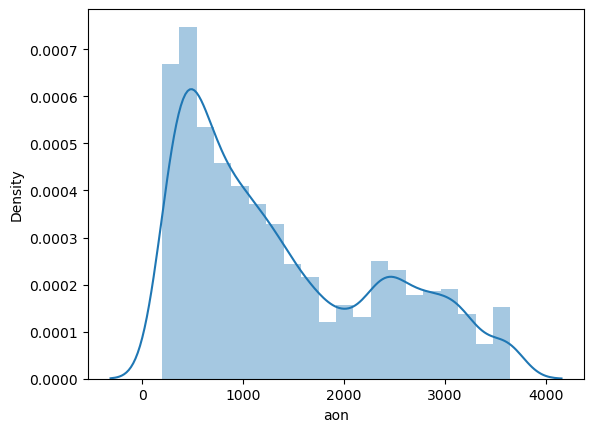

In [59]:
# We will make a dist plot of features
sns.distplot(tc['aon'])
plt.show()

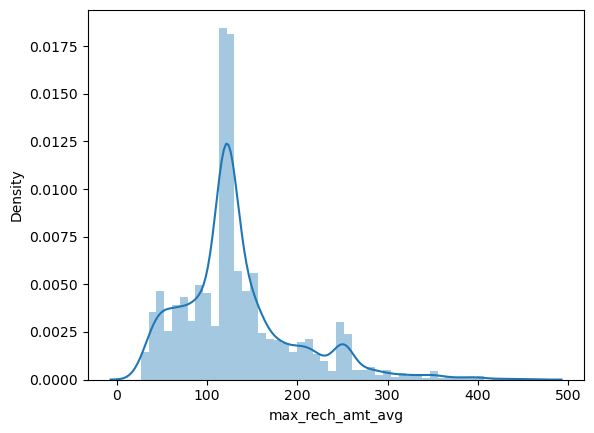

In [60]:
sns.distplot(tc['max_rech_amt_avg'])
plt.show()

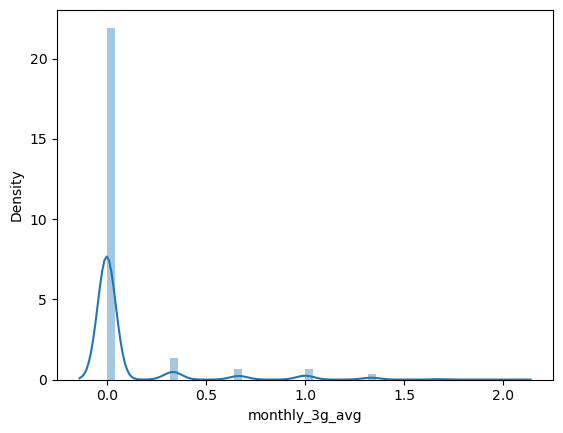

In [61]:
sns.distplot(tc['monthly_3g_avg'])
plt.show()

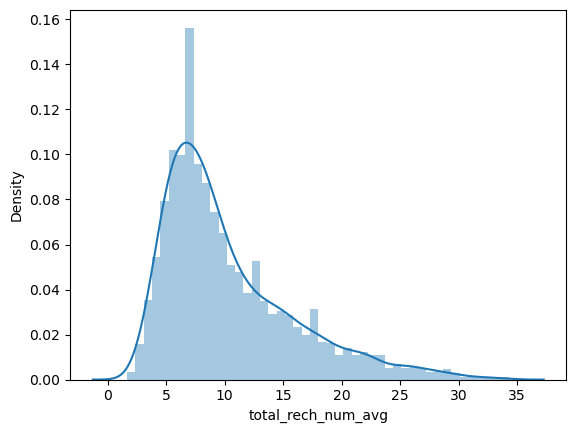

In [62]:
sns.distplot(tc['total_rech_num_avg'])
plt.show()

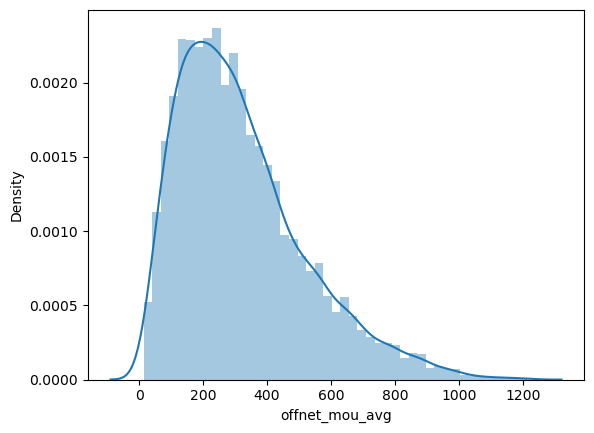

In [63]:
sns.distplot(tc['offnet_mou_avg'])
plt.show()

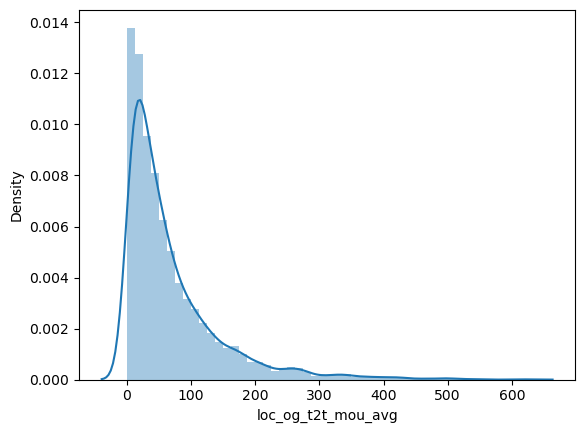

In [64]:
sns.distplot(tc['loc_og_t2t_mou_avg'])
plt.show()

# Linear Regression

In [65]:
# Building a Linear Model

In [66]:
from sklearn.linear_model import LinearRegression
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [67]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-5.474359404146536
[-3.13967307e+00 -2.75061200e-02  2.03507663e-01  7.47751701e-02
 -4.67092981e-03  1.60539673e-01  4.00746298e-01  1.61042796e+00
  5.69846911e-05  6.88107436e-04 -2.00098322e+00 -4.41916274e-01
 -6.84199127e-03  5.61679660e-03  2.97741648e+00 -8.04226122e-04
 -4.79359395e-05 -6.97343604e-03  1.28868778e-01 -1.53070282e-02
 -2.76504677e-02 -5.62144387e-03 -2.79202684e-04 -2.05419720e-02
 -6.17211021e-01 -1.02397667e-03 -1.91181430e-03 -5.32667384e-04
 -5.53877989e-04 -3.19134320e-02]


In [68]:
from sklearn.metrics import r2_score, mean_squared_error

In [69]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.03780016932530916
-1130888307.4479702
92.28711412252923
58327011793.03875
0.020058055666709245
29562601.010156486


In [70]:
# As we can see the values for the R2 for the test and the train dataset are not well fitted 

In [71]:
residuals = y_test - y_pred_test


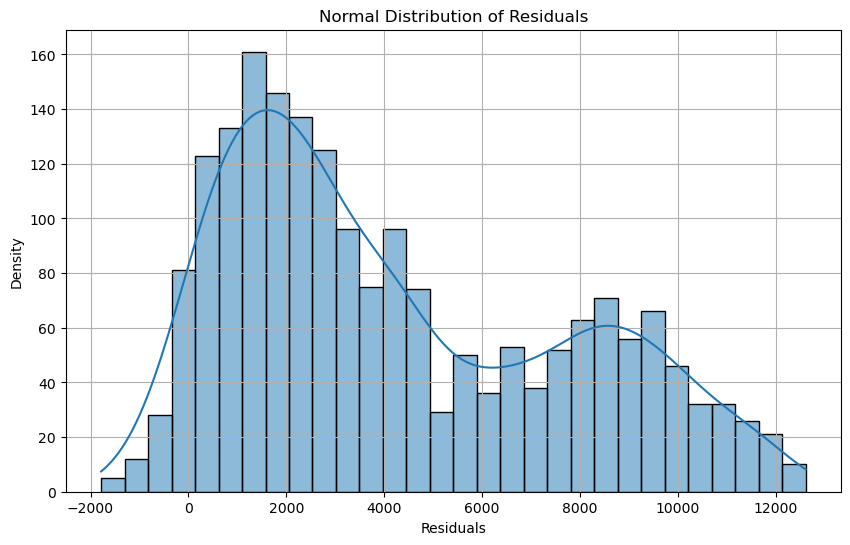

In [72]:
# Plot the normal distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)  # Histogram with KDE (normal distribution curve)
plt.title('Normal Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [73]:
# As we can see that the residuals are not well normally distributes , we will regularise the parameters

# RIDGE & LASSO REGRESSION

In [223]:
# Now we will build our model using Ridge and Lasso Regression , and make features coefficients values close to 0 for ridge
# regression and 0 for some features for Lasso Regression

In [87]:
# We will use some values of alpha corresponding to which , we will see the best fit coefficients
from sklearn.model_selection import GridSearchCV
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ,1500 , 2000 , 2150 , 13000000 ,100000000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500, 2000, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 13000000}


In [89]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 13000000
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.34893026e-09 -1.26848991e-08 -1.10718626e-08 -1.35152017e-08
 -1.82542267e-07 -1.25969862e-08 -8.60976487e-09  2.01583719e-08
  4.71527036e-05  1.06434047e-04  7.82064446e-09 -5.18286941e-08
 -4.45001341e-07  6.50077453e-07  2.58326374e-08 -9.16668698e-07
 -1.41582403e-06  7.18717205e-08 -5.49929482e-08 -1.98324112e-07
  6.46930250e-08 -1.31636246e-06 -1.48180492e-05 -1.73929741e-07
 -6.27969637e-08 -8.99627100e-06 -9.05687525e-07 -6.90509636e-06
 -8.16250641e-06  2.40064729e-07]


In [90]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.0041760134573990415
0.004039618773396203
95.51209526566628
51.367931268940296
0.020758986147721425
0.02603544413022823


In [91]:
# We can see after finding the optimal value of the alpha
# We can see that this value of alpha best fits
# This value of alpha makes best fit on both train and test data set

# Lasso Regression

In [94]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1500, 2000, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [96]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [97]:
lasso.coef_

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.00073189,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        , -0.00017252, -0.        , -0.        ,
       -0.00096832, -0.        , -0.00059685, -0.000393  ,  0.        ])

In [98]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.01666171666193894
0.021347784975814355
94.31455866276599
50.47524044645775
0.020498708685669633
0.025582990596278634


In [99]:
# For Lasso Regression Model , thus alpha value fits  the model
# This value of alpha makes best fits the model for train and test data set 


In [102]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),3.780017e-02,0.004176,0.016662
1,R2 Score (Test),-1.130888e+09,0.004040,0.021348
2,RSS (Train),9.228711e+01,95.512095,94.314559
3,RSS (Test),5.832701e+10,51.367931,50.475240
4,MSE (Train),1.416265e-01,0.144080,0.143174
5,MSE (Test),5.437150e+03,0.161355,0.159947


In [104]:
# From the above table we can see that , the RSS(Test) value of Ridge is MORE than RSS(Test) value of Lasso
#                                       and the MSE(Test) value of Ridge is MORE than MSE(Test) value of Lasso 

# In some ratio of dataset you can get the test value for RSS and MSE for ridge will be less than lasso.
# It can be changed according the ratio of the train and test set being taken from the dataset.


#### Finding the Beta Coefficient

In [105]:

betas = pd.DataFrame(index=X_train.columns)

In [106]:
betas.rows = X.columns

In [107]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [108]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
aon,-3.139673,-3.348930e-09,-0.000000
aug_vbc_3g,-0.027506,-1.268490e-08,-0.000000
jul_vbc_3g,0.203508,-1.107186e-08,-0.000000
jun_vbc_3g,0.074775,-1.351520e-08,-0.000000
sep_vbc_3g,-0.004671,-1.825423e-07,-0.000000
avg_2g_usage,0.160540,-1.259699e-08,-0.000000
avg_3g_usage,0.400746,-8.609765e-09,-0.000000
avg_std_og_mou,1.610428,2.015837e-08,0.000000
avg_roaming_ic_mou,0.000057,4.715270e-05,0.000000
avg_roaming_og_mou,0.000688,1.064340e-04,0.000732


In [109]:
# The above coefficients for Ridge and Lasso Regression with the tuned parameters can be used for finding if the customer will
# churn or not churn . 
# We can choose either Ridge or Lasso Regression model coefficients based on the dataset selected in the ratio.

# We will build our model with Lasso regression

#### As we can see we did hyperparamter tuning with RIDGE and LASSO  regression , we found that final model will be built  with LASSO paramteres .

## Now , we will build another model using LOGISTIC REGRESSION , to find out the important variables corresponding to indicators of the CHURN

 #                                                LOGISTIC REGRESSION 

### Model Building

In [110]:
import statsmodels.api as sm

In [111]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4570
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -371.85
Date:                Sat, 14 Sep 2024   Deviance:                       743.70
Time:                        20:39:27   Pearson chi2:                 3.19e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.04350
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -398.8534    222.786     -1.790      0.073    -835.505      37.798
aon                  -95.6011    144.151     -0.663      0.507    -378.131     186.929
aug_vbc_3g           -23.4309     52.478     -0.446      0.655    -126.286      79.424
jul_vbc_3g            17.5717     40.164      0.438      0.662     -61.148      96.291
jun_vbc_3g             1.9783     39.305      0.050      0.960     -75.058      79.015
sep_vbc_3g            -1.2801      3.094     -0.414      0.679      -7.345       4.784
avg_2g_usage          10.4649     20.000      0.523      0.601     -28.734      49.664
avg_3g_usage          40.2037     93.797      0.429      0.668    -143.634     224.042
avg_std_og_mou        71.3857     52.238      1.367      0.172     -30.998     173.770
avg_roaming_ic_mou     0.0049      0.007      0.659      0.510      -0.010       0.020
avg_roaming_og_mou     0.0199      0.005      4.300      0.000       0.011       0.029
offnet_mou_avg      -190.6625     76.564     -2.490      0.013    -340.725     -40.600
loc_og_t2t_mou_avg   -50.9182     24.215     -2.103      0.035     -98.379      -3.458
loc_og_t2f_mou_avg    -4.9575      3.515     -1.411      0.158     -11.846       1.931
loc_og_t2c_mou_avg     0.2116      0.198      1.068      0.285      -0.177       0.600
std_og_t2m_mou_avg   217.4359     81.295      2.675      0.007      58.100     376.772
std_og_t2f_mou_avg    -0.2227      0.675     -0.330      0.742      -1.547       1.101
isd_og_mou_avg         0.0070      0.067      0.105      0.917      -0.124       0.138
spl_og_mou_avg         0.0089      0.659      0.014      0.989      -1.283       1.301
loc_ic_t2t_mou_avg    13.4185      8.465      1.585      0.113      -3.173      30.010
loc_ic_t2f_mou_avg    -2.3732      3.589     -0.661      0.508      -9.407       4.661
std_ic_t2t_mou_avg    -0.7054      1.422     -0.496      0.620      -3.492       2.081
std_ic_t2f_mou_avg    -2.9414      1.532     -1.920      0.055      -5.944       0.061
spl_ic_mou_avg        -0.0131      0.008     -1.634      0.102      -0.029       0.003
isd_ic_mou_avg        -1.5082      1.146     -1.316      0.188      -3.755       0.739
max_rech_amt_avg     -67.9456     19.775     -3.436      0.001    -106.704     -29.188
monthly_2g_avg        -0.0843      0.082     -1.023      0.306      -0.246       0.077
sachet_2g_avg          0.0408      0.131      0.313      0.755      -0.215       0.297
monthly_3g_avg        -0.0098      0.083     -0.118      0.906      -0.172       0.152
sachet_3g_avg         -0.0878      0.061     -1.443      0.149      -0.207       0.031
total_rech_num_avg    -2.8207      0.919     -3.069      0.002      -4.622      -1.019
======================================================================================
"""

## RFE SELECTION

In [113]:
# We are using the Recursive Feature Elimination Method to make our model for churn 
# We will first use automatically feature selection using this method 
# We will then manually remove the features by checking the p-values ( insignificant features ) and VIF values

In [114]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [115]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)            # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [116]:
rfe.support_

array([False, False, False, False,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False])

In [117]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('aon', False, 9),
 ('aug_vbc_3g', False, 11),
 ('jul_vbc_3g', False, 10),
 ('jun_vbc_3g', False, 12),
 ('sep_vbc_3g', True, 1),
 ('avg_2g_usage', False, 7),
 ('avg_3g_usage', False, 13),
 ('avg_std_og_mou', True, 1),
 ('avg_roaming_ic_mou', False, 16),
 ('avg_roaming_og_mou', False, 14),
 ('offnet_mou_avg', False, 6),
 ('loc_og_t2t_mou_avg', True, 1),
 ('loc_og_t2f_mou_avg', True, 1),
 ('loc_og_t2c_mou_avg', True, 1),
 ('std_og_t2m_mou_avg', True, 1),
 ('std_og_t2f_mou_avg', True, 1),
 ('isd_og_mou_avg', False, 8),
 ('spl_og_mou_avg', True, 1),
 ('loc_ic_t2t_mou_avg', True, 1),
 ('loc_ic_t2f_mou_avg', True, 1),
 ('std_ic_t2t_mou_avg', True, 1),
 ('std_ic_t2f_mou_avg', True, 1),
 ('spl_ic_mou_avg', False, 15),
 ('isd_ic_mou_avg', True, 1),
 ('max_rech_amt_avg', True, 1),
 ('monthly_2g_avg', True, 1),
 ('sachet_2g_avg', False, 4),
 ('monthly_3g_avg', False, 2),
 ('sachet_3g_avg', False, 3),
 ('total_rech_num_avg', False, 5)]

In [118]:
col = X_train.columns[rfe.support_]

In [119]:
X_train.columns[~rfe.support_]

Index(['aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'avg_2g_usage',
       'avg_3g_usage', 'avg_roaming_ic_mou', 'avg_roaming_og_mou',
       'offnet_mou_avg', 'isd_og_mou_avg', 'spl_ic_mou_avg', 'sachet_2g_avg',
       'monthly_3g_avg', 'sachet_3g_avg', 'total_rech_num_avg'],
      dtype='object')

### Assessing the model with Statsmodel

In [120]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4585
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -406.31
Date:                Sat, 14 Sep 2024   Deviance:                       812.63
Time:                        20:39:54   Pearson chi2:                 3.91e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02906
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -42.8417     43.720     -0.980      0.327    -128.530      42.847
sep_vbc_3g            -1.8791      3.131     -0.600      0.548      -8.016       4.258
avg_std_og_mou        58.9468     40.708      1.448      0.148     -20.838     138.732
loc_og_t2t_mou_avg   -71.7948     24.779     -2.897      0.004    -120.360     -23.230
loc_og_t2f_mou_avg    -8.1862      3.887     -2.106      0.035     -15.804      -0.568
loc_og_t2c_mou_avg     0.2946      0.197      1.496      0.135      -0.091       0.680
std_og_t2m_mou_avg    22.8262     20.014      1.140      0.254     -16.401      62.053
std_og_t2f_mou_avg    -0.3746      0.690     -0.543      0.587      -1.728       0.979
spl_og_mou_avg        -0.7658      0.665     -1.152      0.249      -2.069       0.537
loc_ic_t2t_mou_avg    11.7198      8.220      1.426      0.154      -4.391      27.831
loc_ic_t2f_mou_avg    -4.0310      3.696     -1.091      0.275     -11.276       3.214
std_ic_t2t_mou_avg    -0.0422      1.285     -0.033      0.974      -2.560       2.476
std_ic_t2f_mou_avg    -3.0629      1.500     -2.042      0.041      -6.003      -0.123
isd_ic_mou_avg        -1.6357      1.109     -1.475      0.140      -3.809       0.537
max_rech_amt_avg     -21.4458     10.585     -2.026      0.043     -42.192      -0.700
monthly_2g_avg        -0.0838      0.070     -1.190      0.234      -0.222       0.054
======================================================================================
"""

In [121]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

91737    0.068371
55188    0.079707
16319    0.023545
25134    0.082801
57014    0.017560
7790     0.000950
7477     0.041564
63902    0.006324
58977    0.022169
62374    0.002541
dtype: float64

In [122]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06837057, 0.07970732, 0.02354514, 0.08280092, 0.01756005,
       0.00095036, 0.04156443, 0.00632387, 0.02216862, 0.00254056])

In [123]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['mobile_number'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number
0,0,0.068371,91737
1,0,0.079707,55188
2,0,0.023545,16319
3,0,0.082801,25134
4,0,0.017560,57014


In [124]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.068371,91737,0
1,0,0.079707,55188,0
2,0,0.023545,16319,0
3,0,0.082801,25134,0
4,0,0.017560,57014,0


In [125]:
from sklearn import metrics

In [126]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[4503    0]
 [  98    0]]


In [127]:
# Predicted     not_churn    churn
# Actual
# not_churn        4503      0
# churn            98        0 

In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


### CHECKING VIF

In [129]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,avg_std_og_mou,63173.07
5,std_og_t2m_mou_avg,36433.46
13,max_rech_amt_avg,18093.44
2,loc_og_t2t_mou_avg,7313.15
8,loc_ic_t2t_mou_avg,4137.98
9,loc_ic_t2f_mou_avg,124.21
10,std_ic_t2t_mou_avg,57.73
3,loc_og_t2f_mou_avg,29.29
7,spl_og_mou_avg,21.34
12,isd_ic_mou_avg,6.23


In [131]:
col = col.drop('std_ic_t2t_mou_avg', 1)
col

Index(['sep_vbc_3g', 'avg_std_og_mou', 'loc_og_t2t_mou_avg',
       'loc_og_t2f_mou_avg', 'loc_og_t2c_mou_avg', 'std_og_t2m_mou_avg',
       'std_og_t2f_mou_avg', 'spl_og_mou_avg', 'loc_ic_t2t_mou_avg',
       'loc_ic_t2f_mou_avg', 'std_ic_t2f_mou_avg', 'isd_ic_mou_avg',
       'max_rech_amt_avg', 'monthly_2g_avg'],
      dtype='object')

In [133]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4586
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -406.31
Date:                Sat, 14 Sep 2024   Deviance:                       812.63
Time:                        20:40:40   Pearson chi2:                 3.91e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02906
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -42.9852     43.504     -0.988      0.323    -128.252      42.282
sep_vbc_3g            -1.8789      3.132     -0.600      0.549      -8.018       4.261
avg_std_og_mou        58.6134     39.434      1.486      0.137     -18.675     135.902
loc_og_t2t_mou_avg   -71.7748     24.772     -2.897      0.004    -120.328     -23.222
loc_og_t2f_mou_avg    -8.1856      3.887     -2.106      0.035     -15.803      -0.568
loc_og_t2c_mou_avg     0.2943      0.197      1.496      0.135      -0.091       0.680
std_og_t2m_mou_avg    22.9986     19.321      1.190      0.234     -14.870      60.867
std_og_t2f_mou_avg    -0.3753      0.690     -0.544      0.587      -1.728       0.978
spl_og_mou_avg        -0.7667      0.664     -1.154      0.248      -2.068       0.535
loc_ic_t2t_mou_avg    11.6985      8.195      1.428      0.153      -4.363      27.760
loc_ic_t2f_mou_avg    -4.0335      3.696     -1.091      0.275     -11.278       3.210
std_ic_t2f_mou_avg    -3.0633      1.500     -2.042      0.041      -6.003      -0.123
isd_ic_mou_avg        -1.6357      1.109     -1.475      0.140      -3.808       0.537
max_rech_amt_avg     -21.4332     10.577     -2.026      0.043     -42.164      -0.702
monthly_2g_avg        -0.0838      0.070     -1.190      0.234      -0.222       0.054
======================================================================================
"""

In [134]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [135]:
y_train_pred[:10]

array([0.06823994, 0.07948648, 0.02366687, 0.08265217, 0.0175195 ,
       0.00094991, 0.04147768, 0.00631833, 0.02219113, 0.00253764])

In [136]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [137]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.068240,91737,0
1,0,0.079486,55188,0
2,0,0.023667,16319,0
3,0,0.082652,25134,0
4,0,0.017520,57014,0


In [138]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


In [139]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,avg_std_og_mou,59487.71
5,std_og_t2m_mou_avg,35237.33
12,max_rech_amt_avg,17938.93
2,loc_og_t2t_mou_avg,7251.58
8,loc_ic_t2t_mou_avg,4135.24
9,loc_ic_t2f_mou_avg,124.17
3,loc_og_t2f_mou_avg,29.29
7,spl_og_mou_avg,21.33
11,isd_ic_mou_avg,6.20
4,loc_og_t2c_mou_avg,2.43


In [140]:
col = col.drop('std_og_t2f_mou_avg', 1)
col


Index(['sep_vbc_3g', 'avg_std_og_mou', 'loc_og_t2t_mou_avg',
       'loc_og_t2f_mou_avg', 'loc_og_t2c_mou_avg', 'std_og_t2m_mou_avg',
       'spl_og_mou_avg', 'loc_ic_t2t_mou_avg', 'loc_ic_t2f_mou_avg',
       'std_ic_t2f_mou_avg', 'isd_ic_mou_avg', 'max_rech_amt_avg',
       'monthly_2g_avg'],
      dtype='object')

In [142]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4587
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -406.50
Date:                Sat, 14 Sep 2024   Deviance:                       812.99
Time:                        20:41:02   Pearson chi2:                 3.94e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02898
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -42.9496     43.442     -0.989      0.323    -128.094      42.195
sep_vbc_3g            -1.8571      3.123     -0.595      0.552      -7.978       4.264
avg_std_og_mou        59.9281     39.364      1.522      0.128     -17.224     137.080
loc_og_t2t_mou_avg   -71.8056     24.772     -2.899      0.004    -120.357     -23.254
loc_og_t2f_mou_avg    -8.3734      3.890     -2.153      0.031     -15.998      -0.749
loc_og_t2c_mou_avg     0.2934      0.197      1.491      0.136      -0.092       0.679
std_og_t2m_mou_avg    22.6473     19.304      1.173      0.241     -15.188      60.483
spl_og_mou_avg        -0.7654      0.664     -1.153      0.249      -2.066       0.535
loc_ic_t2t_mou_avg    11.7910      8.196      1.439      0.150      -4.273      27.855
loc_ic_t2f_mou_avg    -4.0299      3.691     -1.092      0.275     -11.264       3.204
std_ic_t2f_mou_avg    -3.1906      1.499     -2.128      0.033      -6.129      -0.252
isd_ic_mou_avg        -1.6317      1.109     -1.471      0.141      -3.805       0.542
max_rech_amt_avg     -21.8921     10.551     -2.075      0.038     -42.573      -1.212
monthly_2g_avg        -0.0840      0.070     -1.193      0.233      -0.222       0.054
======================================================================================
"""

In [143]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [144]:
y_train_pred[:10]

array([0.06797212, 0.0795267 , 0.02329917, 0.08256591, 0.01747558,
       0.00096229, 0.04129182, 0.00704423, 0.02218908, 0.00247319])

In [145]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [146]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.067972,91737,0
1,0,0.079527,55188,0
2,0,0.023299,16319,0
3,0,0.082566,25134,0
4,0,0.017476,57014,0


In [147]:

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


In [148]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,avg_std_og_mou,59308.64
5,std_og_t2m_mou_avg,35234.63
11,max_rech_amt_avg,17747.46
2,loc_og_t2t_mou_avg,7251.08
7,loc_ic_t2t_mou_avg,4128.81
8,loc_ic_t2f_mou_avg,124.00
3,loc_og_t2f_mou_avg,28.84
6,spl_og_mou_avg,21.33
10,isd_ic_mou_avg,6.20
4,loc_og_t2c_mou_avg,2.43


In [149]:
col = col.drop('sep_vbc_3g', 1)
col


Index(['avg_std_og_mou', 'loc_og_t2t_mou_avg', 'loc_og_t2f_mou_avg',
       'loc_og_t2c_mou_avg', 'std_og_t2m_mou_avg', 'spl_og_mou_avg',
       'loc_ic_t2t_mou_avg', 'loc_ic_t2f_mou_avg', 'std_ic_t2f_mou_avg',
       'isd_ic_mou_avg', 'max_rech_amt_avg', 'monthly_2g_avg'],
      dtype='object')

In [150]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4588
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -406.90
Date:                Sat, 14 Sep 2024   Deviance:                       813.80
Time:                        20:41:17   Pearson chi2:                 4.00e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02881
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -41.0428     43.328     -0.947      0.344    -125.964      43.878
avg_std_og_mou        62.4279     39.260      1.590      0.112     -14.519     139.375
loc_og_t2t_mou_avg   -71.5357     24.731     -2.893      0.004    -120.007     -23.064
loc_og_t2f_mou_avg    -8.4237      3.896     -2.162      0.031     -16.059      -0.788
loc_og_t2c_mou_avg     0.2873      0.197      1.462      0.144      -0.098       0.672
std_og_t2m_mou_avg    22.4537     19.290      1.164      0.244     -15.355      60.262
spl_og_mou_avg        -0.7795      0.663     -1.175      0.240      -2.079       0.521
loc_ic_t2t_mou_avg    11.7580      8.201      1.434      0.152      -4.316      27.832
loc_ic_t2f_mou_avg    -4.0686      3.688     -1.103      0.270     -11.298       3.161
std_ic_t2f_mou_avg    -3.1976      1.501     -2.130      0.033      -6.139      -0.256
isd_ic_mou_avg        -1.6416      1.112     -1.477      0.140      -3.821       0.537
max_rech_amt_avg     -22.2326     10.548     -2.108      0.035     -42.906      -1.559
monthly_2g_avg        -0.0881      0.071     -1.249      0.212      -0.226       0.050
======================================================================================
"""

In [151]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [152]:
y_train_pred[:10]

array([0.06813312, 0.07942484, 0.02315141, 0.08311372, 0.01714123,
       0.00093623, 0.041149  , 0.00679924, 0.02182361, 0.00221871])

In [153]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [154]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.068133,91737,0
1,0,0.079425,55188,0
2,0,0.023151,16319,0
3,0,0.083114,25134,0
4,0,0.017141,57014,0


In [155]:

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


In [156]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,avg_std_og_mou,59179.61
4,std_og_t2m_mou_avg,35232.13
10,max_rech_amt_avg,17657.76
1,loc_og_t2t_mou_avg,7250.51
6,loc_ic_t2t_mou_avg,4126.01
7,loc_ic_t2f_mou_avg,123.98
2,loc_og_t2f_mou_avg,28.84
5,spl_og_mou_avg,21.32
9,isd_ic_mou_avg,6.20
3,loc_og_t2c_mou_avg,2.42


In [157]:
col = col.drop('loc_ic_t2f_mou_avg', 1)
col


Index(['avg_std_og_mou', 'loc_og_t2t_mou_avg', 'loc_og_t2f_mou_avg',
       'loc_og_t2c_mou_avg', 'std_og_t2m_mou_avg', 'spl_og_mou_avg',
       'loc_ic_t2t_mou_avg', 'std_ic_t2f_mou_avg', 'isd_ic_mou_avg',
       'max_rech_amt_avg', 'monthly_2g_avg'],
      dtype='object')

In [158]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4589
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -407.65
Date:                Sat, 14 Sep 2024   Deviance:                       815.30
Time:                        20:41:40   Pearson chi2:                 4.08e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02850
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -38.1917     43.187     -0.884      0.377    -122.837      46.453
avg_std_og_mou        63.7819     39.117      1.631      0.103     -12.885     140.449
loc_og_t2t_mou_avg   -70.6337     24.655     -2.865      0.004    -118.956     -22.311
loc_og_t2f_mou_avg    -9.7062      3.868     -2.509      0.012     -17.287      -2.125
loc_og_t2c_mou_avg     0.2838      0.197      1.442      0.149      -0.102       0.669
std_og_t2m_mou_avg    23.0394     19.274      1.195      0.232     -14.737      60.816
spl_og_mou_avg        -0.7748      0.664     -1.167      0.243      -2.076       0.526
loc_ic_t2t_mou_avg    10.9492      8.185      1.338      0.181      -5.094      26.992
std_ic_t2f_mou_avg    -3.3341      1.507     -2.212      0.027      -6.288      -0.380
isd_ic_mou_avg        -1.6368      1.109     -1.475      0.140      -3.811       0.538
max_rech_amt_avg     -22.4779     10.559     -2.129      0.033     -43.172      -1.783
monthly_2g_avg        -0.0909      0.070     -1.290      0.197      -0.229       0.047
======================================================================================
"""

In [159]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [160]:
y_train_pred[:10]

array([0.06667351, 0.07672768, 0.0226694 , 0.08095348, 0.03659633,
       0.00079376, 0.03943734, 0.0075161 , 0.02042215, 0.00335548])

In [161]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [162]:

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.066674,91737,0
1,0,0.076728,55188,0
2,0,0.022669,16319,0
3,0,0.080953,25134,0
4,0,0.036596,57014,0


In [163]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


In [164]:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,avg_std_og_mou,59173.33
4,std_og_t2m_mou_avg,35204.84
9,max_rech_amt_avg,17589.62
1,loc_og_t2t_mou_avg,7250.47
6,loc_ic_t2t_mou_avg,4112.60
2,loc_og_t2f_mou_avg,24.65
5,spl_og_mou_avg,21.31
8,isd_ic_mou_avg,6.20
3,loc_og_t2c_mou_avg,2.42
7,std_ic_t2f_mou_avg,1.84


In [165]:
col = col.drop('spl_og_mou_avg',1)
col

Index(['avg_std_og_mou', 'loc_og_t2t_mou_avg', 'loc_og_t2f_mou_avg',
       'loc_og_t2c_mou_avg', 'std_og_t2m_mou_avg', 'loc_ic_t2t_mou_avg',
       'std_ic_t2f_mou_avg', 'isd_ic_mou_avg', 'max_rech_amt_avg',
       'monthly_2g_avg'],
      dtype='object')

In [166]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4590
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -408.39
Date:                Sat, 14 Sep 2024   Deviance:                       816.78
Time:                        20:42:01   Pearson chi2:                 3.94e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02818
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -38.7258     43.081     -0.899      0.369    -123.163      45.711
avg_std_og_mou        60.4112     39.056      1.547      0.122     -16.137     136.959
loc_og_t2t_mou_avg   -70.8410     24.679     -2.870      0.004    -119.211     -22.471
loc_og_t2f_mou_avg    -9.6332      3.857     -2.497      0.013     -17.193      -2.073
loc_og_t2c_mou_avg     0.1378      0.157      0.876      0.381      -0.171       0.446
std_og_t2m_mou_avg    24.2657     19.281      1.259      0.208     -13.524      62.055
loc_ic_t2t_mou_avg    10.6106      8.221      1.291      0.197      -5.502      26.723
std_ic_t2f_mou_avg    -3.3578      1.506     -2.230      0.026      -6.309      -0.406
isd_ic_mou_avg        -1.6322      1.109     -1.472      0.141      -3.805       0.541
max_rech_amt_avg     -21.6555     10.539     -2.055      0.040     -42.311      -1.000
monthly_2g_avg        -0.0907      0.071     -1.285      0.199      -0.229       0.048
======================================================================================
"""

In [167]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [168]:
y_train_pred[:10]

array([0.09091935, 0.0707396 , 0.02343202, 0.09471137, 0.04911815,
       0.0007674 , 0.04579032, 0.00675002, 0.02031997, 0.00322737])

In [169]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [170]:

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.090919,91737,0
1,0,0.070740,55188,0
2,0,0.023432,16319,0
3,0,0.094711,25134,0
4,0,0.049118,57014,0


In [171]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))


0.9787002825472724


In [172]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,avg_std_og_mou,58693.46
4,std_og_t2m_mou_avg,35179.68
8,max_rech_amt_avg,17382.95
1,loc_og_t2t_mou_avg,7250.47
5,loc_ic_t2t_mou_avg,4110.66
2,loc_og_t2f_mou_avg,24.65
7,isd_ic_mou_avg,6.20
6,std_ic_t2f_mou_avg,1.84
3,loc_og_t2c_mou_avg,1.75
9,monthly_2g_avg,1.11


In [173]:
col = col.drop('loc_og_t2c_mou_avg', 1)
col

Index(['avg_std_og_mou', 'loc_og_t2t_mou_avg', 'loc_og_t2f_mou_avg',
       'std_og_t2m_mou_avg', 'loc_ic_t2t_mou_avg', 'std_ic_t2f_mou_avg',
       'isd_ic_mou_avg', 'max_rech_amt_avg', 'monthly_2g_avg'],
      dtype='object')

In [174]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4591
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -408.75
Date:                Sat, 14 Sep 2024   Deviance:                       817.49
Time:                        20:42:16   Pearson chi2:                 3.91e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02803
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -38.5779     43.074     -0.896      0.370    -123.001      45.845
avg_std_og_mou        61.9040     39.018      1.587      0.113     -14.571     138.379
loc_og_t2t_mou_avg   -71.2804     24.712     -2.884      0.004    -119.715     -22.846
loc_og_t2f_mou_avg    -9.6606      3.858     -2.504      0.012     -17.222      -2.099
std_og_t2m_mou_avg    23.7516     19.258      1.233      0.217     -13.993      61.497
loc_ic_t2t_mou_avg    10.4027      8.217      1.266      0.205      -5.702      26.507
std_ic_t2f_mou_avg    -3.3507      1.503     -2.230      0.026      -6.296      -0.406
isd_ic_mou_avg        -1.6153      1.103     -1.464      0.143      -3.777       0.547
max_rech_amt_avg     -21.7433     10.514     -2.068      0.039     -42.351      -1.136
monthly_2g_avg        -0.0892      0.070     -1.268      0.205      -0.227       0.049
======================================================================================
"""

In [175]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [176]:
y_train_pred[:10]

array([0.09523401, 0.06756514, 0.02433419, 0.09930946, 0.05075723,
       0.00078905, 0.04790019, 0.00593793, 0.02089476, 0.00345844])

In [177]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [178]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.095234,91737,0
1,0,0.067565,55188,0
2,0,0.024334,16319,0
3,0,0.099309,25134,0
4,0,0.050757,57014,0


In [179]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


In [180]:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,avg_std_og_mou,58575.59
3,std_og_t2m_mou_avg,35179.63
7,max_rech_amt_avg,17319.30
1,loc_og_t2t_mou_avg,7250.34
4,loc_ic_t2t_mou_avg,4106.33
2,loc_og_t2f_mou_avg,24.64
6,isd_ic_mou_avg,6.19
5,std_ic_t2f_mou_avg,1.84
8,monthly_2g_avg,1.11


In [181]:
col = col.drop('std_og_t2m_mou_avg', 1)
col

Index(['avg_std_og_mou', 'loc_og_t2t_mou_avg', 'loc_og_t2f_mou_avg',
       'loc_ic_t2t_mou_avg', 'std_ic_t2f_mou_avg', 'isd_ic_mou_avg',
       'max_rech_amt_avg', 'monthly_2g_avg'],
      dtype='object')

In [182]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4592
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -409.51
Date:                Sat, 14 Sep 2024   Deviance:                       819.02
Time:                        20:42:39   Pearson chi2:                 4.00e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02771
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -34.5675     42.695     -0.810      0.418    -118.247      49.112
avg_std_og_mou        85.2333     33.091      2.576      0.010      20.376     150.091
loc_og_t2t_mou_avg   -72.0556     24.858     -2.899      0.004    -120.776     -23.336
loc_og_t2f_mou_avg    -9.6833      3.849     -2.516      0.012     -17.227      -2.140
loc_ic_t2t_mou_avg     9.9713      8.248      1.209      0.227      -6.194      26.137
std_ic_t2f_mou_avg    -3.3438      1.502     -2.226      0.026      -6.288      -0.400
isd_ic_mou_avg        -1.5605      1.094     -1.427      0.154      -3.704       0.583
max_rech_amt_avg     -21.6948     10.470     -2.072      0.038     -42.215      -1.175
monthly_2g_avg        -0.0908      0.071     -1.287      0.198      -0.229       0.048
======================================================================================
"""

In [183]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [184]:
y_train_pred[:10]

array([0.08724536, 0.07655677, 0.02409661, 0.1010839 , 0.05358855,
       0.00079645, 0.05476063, 0.00610565, 0.02137632, 0.00343497])

In [185]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [186]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.087245,91737,0
1,0,0.076557,55188,0
2,0,0.024097,16319,0
3,0,0.101084,25134,0
4,0,0.053589,57014,0


In [187]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


In [188]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,max_rech_amt_avg,17181.83
0,avg_std_og_mou,15864.69
1,loc_og_t2t_mou_avg,7231.55
3,loc_ic_t2t_mou_avg,4097.23
2,loc_og_t2f_mou_avg,24.62
5,isd_ic_mou_avg,6.18
4,std_ic_t2f_mou_avg,1.84
7,monthly_2g_avg,1.11


In [189]:
col = col.drop('loc_ic_t2t_mou_avg', 1)
col

Index(['avg_std_og_mou', 'loc_og_t2t_mou_avg', 'loc_og_t2f_mou_avg',
       'std_ic_t2f_mou_avg', 'isd_ic_mou_avg', 'max_rech_amt_avg',
       'monthly_2g_avg'],
      dtype='object')

In [190]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4593
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -410.18
Date:                Sat, 14 Sep 2024   Deviance:                       820.36
Time:                        20:42:57   Pearson chi2:                 4.05e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02743
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -32.7442     42.452     -0.771      0.441    -115.949      50.460
avg_std_og_mou        83.8839     33.134      2.532      0.011      18.943     148.825
loc_og_t2t_mou_avg   -56.9301     20.250     -2.811      0.005     -96.619     -17.242
loc_og_t2f_mou_avg    -9.7895      3.858     -2.538      0.011     -17.350      -2.229
std_ic_t2f_mou_avg    -3.3300      1.501     -2.218      0.027      -6.272      -0.388
isd_ic_mou_avg        -1.5837      1.093     -1.449      0.147      -3.725       0.558
max_rech_amt_avg     -21.7427     10.472     -2.076      0.038     -42.267      -1.218
monthly_2g_avg        -0.0890      0.071     -1.262      0.207      -0.227       0.049
======================================================================================
"""

In [191]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)


In [192]:
y_train_pred[:10]

array([0.09037136, 0.08190033, 0.02466674, 0.09625686, 0.05687466,
       0.00104855, 0.05212443, 0.00657035, 0.02146725, 0.00373382])

In [193]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [194]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.090371,91737,0
1,0,0.081900,55188,0
2,0,0.024667,16319,0
3,0,0.096257,25134,0
4,0,0.056875,57014,0


In [195]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


In [196]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,max_rech_amt_avg,17075.48
0,avg_std_og_mou,15862.81
1,loc_og_t2t_mou_avg,4505.32
2,loc_og_t2f_mou_avg,24.62
4,isd_ic_mou_avg,6.18
3,std_ic_t2f_mou_avg,1.84
6,monthly_2g_avg,1.11


In [197]:
col = col.drop('monthly_2g_avg', 1)
col

Index(['avg_std_og_mou', 'loc_og_t2t_mou_avg', 'loc_og_t2f_mou_avg',
       'std_ic_t2f_mou_avg', 'isd_ic_mou_avg', 'max_rech_amt_avg'],
      dtype='object')

In [198]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4594
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -411.24
Date:                Sat, 14 Sep 2024   Deviance:                       822.49
Time:                        20:43:14   Pearson chi2:                 4.19e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02698
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -30.9214     42.461     -0.728      0.466    -114.144      52.302
avg_std_og_mou        93.4016     32.555      2.869      0.004      29.594     157.209
loc_og_t2t_mou_avg   -55.1272     20.103     -2.742      0.006     -94.528     -15.726
loc_og_t2f_mou_avg    -9.9920      3.888     -2.570      0.010     -17.613      -2.371
std_ic_t2f_mou_avg    -3.3173      1.490     -2.226      0.026      -6.238      -0.397
isd_ic_mou_avg        -1.5845      1.094     -1.449      0.147      -3.728       0.559
max_rech_amt_avg     -25.7910     10.295     -2.505      0.012     -45.970      -5.612
======================================================================================
"""

In [199]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [200]:
y_train_pred[:10]

array([0.09104868, 0.08354759, 0.02327   , 0.09701267, 0.05603443,
       0.00084787, 0.05010013, 0.00567389, 0.01956721, 0.01868455])

In [201]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [202]:

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.091049,91737,0
1,0,0.083548,55188,0
2,0,0.023270,16319,0
3,0,0.097013,25134,0
4,0,0.056034,57014,0


In [203]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


In [204]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,max_rech_amt_avg,15928.24
0,avg_std_og_mou,14917.18
1,loc_og_t2t_mou_avg,4495.59
2,loc_og_t2f_mou_avg,24.62
4,isd_ic_mou_avg,6.18
3,std_ic_t2f_mou_avg,1.83


In [205]:
col = col.drop('isd_ic_mou_avg', 1)
col

Index(['avg_std_og_mou', 'loc_og_t2t_mou_avg', 'loc_og_t2f_mou_avg',
       'std_ic_t2f_mou_avg', 'max_rech_amt_avg'],
      dtype='object')

In [206]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4595
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -412.69
Date:                Sat, 14 Sep 2024   Deviance:                       825.39
Time:                        20:43:31   Pearson chi2:                 4.12e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02636
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -33.6757     42.513     -0.792      0.428    -116.999      49.648
avg_std_og_mou        91.5155     32.687      2.800      0.005      27.450     155.581
loc_og_t2t_mou_avg   -55.5194     20.066     -2.767      0.006     -94.849     -16.190
loc_og_t2f_mou_avg    -9.9304      3.880     -2.559      0.010     -17.535      -2.326
std_ic_t2f_mou_avg    -3.3461      1.493     -2.242      0.025      -6.271      -0.421
max_rech_amt_avg     -26.3822     10.324     -2.555      0.011     -46.617      -6.147
======================================================================================
"""

In [207]:
# So for this train and test ratio , we get p values for all the features less than 0.05  that is :
# avg_std_og_mou
# loc_og_t2t_mou_avg
# loc_og_t2f_mou_avg
# std_ic_t2f_mou_avg
# max_rech_amt_avg

In [208]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [209]:
y_train_pred[:10]

array([0.08569834, 0.08038394, 0.02197055, 0.09114442, 0.05388186,
       0.00078643, 0.04729435, 0.00536437, 0.01857948, 0.01778898])

In [210]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [211]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.085698,91737,0
1,0,0.080384,55188,0
2,0,0.021971,16319,0
3,0,0.091144,25134,0
4,0,0.053882,57014,0


In [212]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


In [213]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,max_rech_amt_avg,15918.57
0,avg_std_og_mou,14917.16
1,loc_og_t2t_mou_avg,4495.02
2,loc_og_t2f_mou_avg,24.61
3,std_ic_t2f_mou_avg,1.83


In [214]:
# Checking the VIF values for the features having less than 0.5  , we can see that they have very high VIF 
# We will remove them

In [215]:
col = col.drop('max_rech_amt_avg', 1)
col

Index(['avg_std_og_mou', 'loc_og_t2t_mou_avg', 'loc_og_t2f_mou_avg',
       'std_ic_t2f_mou_avg'],
      dtype='object')

In [216]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4596
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -416.23
Date:                Sat, 14 Sep 2024   Deviance:                       832.46
Time:                        20:44:10   Pearson chi2:                 4.17e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02487
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.8388     39.332      0.276      0.783     -66.251      87.929
avg_std_og_mou        87.9282     31.981      2.749      0.006      25.246     150.610
loc_og_t2t_mou_avg   -62.6047     20.380     -3.072      0.002    -102.549     -22.661
loc_og_t2f_mou_avg   -11.7192      3.942     -2.973      0.003     -19.446      -3.993
std_ic_t2f_mou_avg    -3.6399      1.516     -2.400      0.016      -6.612      -0.668
======================================================================================
"""

In [217]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [218]:
y_train_pred[:10]

array([0.08938452, 0.05825971, 0.02563589, 0.09935229, 0.04007088,
       0.00145675, 0.05310985, 0.00639064, 0.02004818, 0.0243889 ])

In [219]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [220]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.089385,91737,0
1,0,0.058260,55188,0
2,0,0.025636,16319,0
3,0,0.099352,25134,0
4,0,0.040071,57014,0


In [221]:

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


In [222]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_og_t2t_mou_avg,4092.42
0,avg_std_og_mou,4001.99
2,loc_og_t2f_mou_avg,22.19
3,std_ic_t2f_mou_avg,1.80


In [223]:
col = col.drop('loc_og_t2t_mou_avg', 1)
col

Index(['avg_std_og_mou', 'loc_og_t2f_mou_avg', 'std_ic_t2f_mou_avg'], dtype='object')

In [224]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4597
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -423.34
Date:                Sat, 14 Sep 2024   Deviance:                       846.68
Time:                        20:44:21   Pearson chi2:                 5.24e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.02185
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                105.6403     28.202      3.746      0.000      50.365     160.916
avg_std_og_mou       130.5714     29.922      4.364      0.000      71.925     189.218
loc_og_t2f_mou_avg   -12.9114      3.998     -3.229      0.001     -20.748      -5.074
std_ic_t2f_mou_avg    -3.9473      1.552     -2.544      0.011      -6.988      -0.906
======================================================================================
"""

In [225]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [226]:
y_train_pred[:10]

array([0.08667846, 0.04685581, 0.03456207, 0.09876198, 0.02952604,
       0.00277063, 0.05125227, 0.00352223, 0.01282083, 0.01546392])

In [227]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [228]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.086678,91737,0
1,0,0.046856,55188,0
2,0,0.034562,16319,0
3,0,0.098762,25134,0
4,0,0.029526,57014,0


In [229]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


In [230]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,loc_og_t2f_mou_avg,21.58
0,avg_std_og_mou,21.14
2,std_ic_t2f_mou_avg,1.78


In [231]:
col = col.drop('loc_og_t2f_mou_avg', 1)
col

Index(['avg_std_og_mou', 'std_ic_t2f_mou_avg'], dtype='object')

In [232]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4601
Model:                            GLM   Df Residuals:                     4598
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -434.26
Date:                Sat, 14 Sep 2024   Deviance:                       868.52
Time:                        20:44:26   Pearson chi2:                 3.97e+03
No. Iterations:                    10   Pseudo R-squ. (CS):            0.01719
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                152.9720     26.075      5.867      0.000     101.866     204.078
avg_std_og_mou       173.9858     28.314      6.145      0.000     118.490     229.481
std_ic_t2f_mou_avg    -4.6128      1.622     -2.844      0.004      -7.792      -1.434
======================================================================================
"""

In [233]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [234]:
y_train_pred[:10]

array([0.09107121, 0.03720468, 0.02541507, 0.10108455, 0.0200175 ,
       0.00423108, 0.04197736, 0.00349964, 0.00724572, 0.01299643])

In [235]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [236]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted
0,0,0.091071,91737,0
1,0,0.037205,55188,0
2,0,0.025415,16319,0
3,0,0.101085,25134,0
4,0,0.020017,57014,0


In [237]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9787002825472724


In [238]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,avg_std_og_mou,1.74
1,std_ic_t2f_mou_avg,1.74


In [239]:
# After removing the features having high vif for this case of train and test split , we can find that these are the features
# which are significant and have VIF less than 5

# avg_std_og_mou
# std_ic_t2f_mou_avg

In [240]:
# So , we can build our model like :
# y = 152.9720 + 173.9858*avg_std_og_mou + (-4.6128)*std_ic_t2f_mou_avg

In [241]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[4503,    0],
       [  98,    0]], dtype=int64)

In [242]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.9787002825472724

In [243]:
# Now we can see that we have an accuracy of 97 percentage , which means that our model overfits the dataset
# Now we will use some other techniques to make this model bestfit

In [248]:
# As we can see from the confusion matrix  , we get accuracy approx equal to 97 percentage , 
# This is due to the fact that we chose a cutoff probability which is equal to 0.5
# Due to which we get less or no number of customers who will churn
# This less number of churn is due to the data imbalance 
# To overcome this problem , we will see some more techniques to improve our accuracy.

## Metrics Beyond Simple Accuracy

In [249]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [250]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.0

In [251]:
# Let us calculate specificity
TN / float(TN+FP)

1.0

In [252]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0


In [253]:
# positive predictive value 
print (TP / float(TP+FP))

nan


In [254]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9787002825472724


## ROC CURVE

In [255]:
# ROC curve will give you the curve which tells of the model bulit was good or not 
# ROC curve measures the performance of binary classification model

In [259]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [260]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

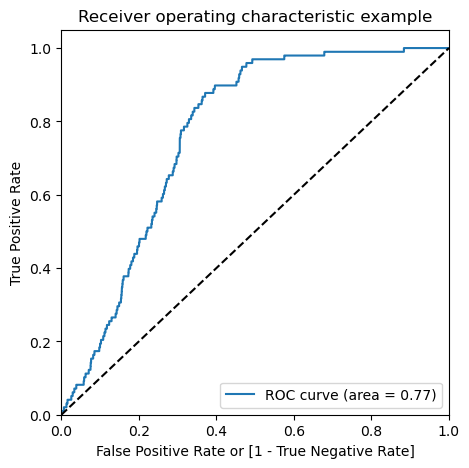

In [261]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [262]:
# As we can see area under the curve is 0.77  , the model we  built has a good performance

### Finding Optimal CUTOFF

In [263]:
# In previous case of LOGISTIC REGRESSION , we were building model by taking the probability cut off of greater than 0.5
# So we need to find out the optimal cut off which will make our model more predictable
# To make our model sensitivity and specificity good and also make our model fit from overfitting the data , we need to findout
# out the optimal cutoff

In [264]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.091071,91737,0,1,0,0,0,0,0,0,0,0,0
1,0,0.037205,55188,0,1,0,0,0,0,0,0,0,0,0
2,0,0.025415,16319,0,1,0,0,0,0,0,0,0,0,0
3,0,0.101085,25134,0,1,1,0,0,0,0,0,0,0,0
4,0,0.020017,57014,0,1,0,0,0,0,0,0,0,0,0


In [265]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.021300  1.000000  0.000000
0.1   0.1  0.974571  0.010204  0.995559
0.2   0.2  0.978700  0.000000  1.000000
0.3   0.3  0.978700  0.000000  1.000000
0.4   0.4  0.978700  0.000000  1.000000
0.5   0.5  0.978700  0.000000  1.000000
0.6   0.6  0.978700  0.000000  1.000000
0.7   0.7  0.978700  0.000000  1.000000
0.8   0.8  0.978700  0.000000  1.000000
0.9   0.9  0.978700  0.000000  1.000000


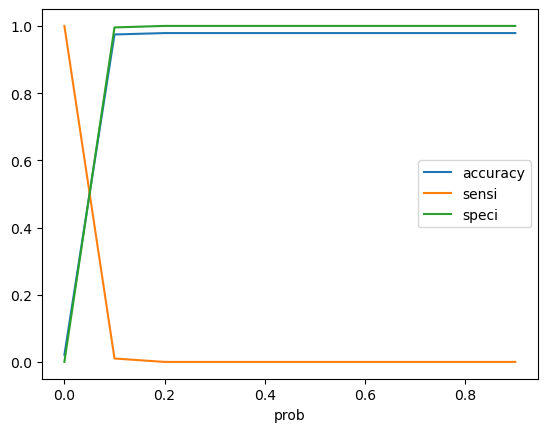

In [266]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [267]:
# From the above curve of the accuracy , sensitivity and specificity 
# We found a optimal cut off which is around 0.06 ( which is very low)
# As we have data imbalance , we have 99999 data points at the starting which makes churn customer to 5%
# But after making missing values treatment and also removing outliers 
# We left with around 3% churn customer 
# which makes difficult to get high pribability of cutoff

In [268]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.06 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,mobile_number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.091071,91737,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0.037205,55188,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.025415,16319,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.101085,25134,0,1,1,0,0,0,0,0,0,0,0,1
4,0,0.020017,57014,0,1,0,0,0,0,0,0,0,0,0,0


In [269]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.9271897413605737

In [270]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[4258,  245],
       [  90,    8]], dtype=int64)

In [271]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [274]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.08163265306122448

In [275]:
# Let us calculate specificity
TN / float(TN+FP)

0.9455918276704419

In [276]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05440817232955807


In [277]:
# Positive predictive value 
print (TP / float(TP+FP))

0.03162055335968379


In [278]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9793008279668813


In [279]:
# We can say that after finding the specificity , sensitivity and accuracy for the various probability cutoffs
# We came to a cut off where all coincide
# That cut off is known as optimal cutoff

## PRECISION AND RECALL

In [280]:
from sklearn.metrics import precision_score, recall_score

In [281]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.0

In [282]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.0

In [283]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      1
 26      0
 27      0
 28      0
 29      0
 30      0
 31      0
 32      0
 33      0
 34      0
 35      0
 36      0
 37      0
 38      0
 39      0
 40      0
 41      0
 42      0
 43      0
 44      0
 45      0
 46      0
 47      0
 48      0
 49      0
 50      0
 51      0
 52      0
 53      0
 54      0
 55      0
 56      0
 57      0
 58      0
 59      1
 60      0
 61      0
 62      0
 63      0
 64      0
 65      0
 66      0
 67      0
 68      0
 69      0
 70      0
 71      0
 72      0
 73      0
 74      0
 75      0
 76      0
 77      0
 78      0
 79      0
 80      0
 81      0
 82      0
 83      0
 84      0
 85      0
 86      0
 87      0
 88      0
 89      0
 90      0

In [284]:
from sklearn.metrics import precision_recall_curve

In [285]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding optimal cutoff

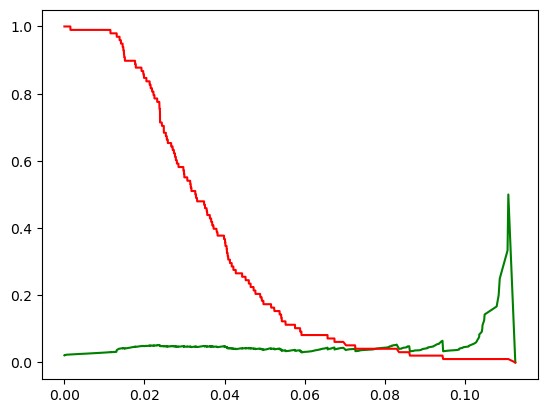

In [286]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Prediction on TEST set

In [332]:
X_test = X_test[col]
X_test.head()

,avg_std_og_mou,std_ic_t2f_mou_avg
62145,83.270000,0.136667
62102,6.526667,0.000000
70131,630.166667,0.000000
1881,0.000000,0.000000
97917,202.166667,0.000000


In [333]:
X_test_sm = sm.add_constant(X_test)

In [334]:
y_test_pred = res.predict(X_test_sm)

In [335]:
y_test_pred[:10]

62145    1.0
62102    1.0
70131    1.0
1881     1.0
97917    1.0
95832    1.0
26639    1.0
96591    1.0
9188     1.0
30654    1.0
dtype: float64

In [336]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [337]:
# Let's see the head
y_pred_1.head()

,0
62145,1.0
62102,1.0
70131,1.0
1881,1.0
97917,1.0


In [338]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [339]:

y_test_df['mobile_number'] = y_test_df.index

In [340]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [341]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [342]:
y_pred_final.head()

,Churn,mobile_number,0
0,0,62145,1.0
1,0,62102,1.0
2,0,70131,1.0
3,0,1881,1.0
4,0,97917,1.0


In [343]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [344]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['mobile_number', 'Churn', 'Churn_Prob'], axis=1)


In [345]:
# Let's see the head of y_pred_final
y_pred_final.head()

,mobile_number,Churn,Churn_Prob
0,62145,0,1.0
1,62102,0,1.0
2,70131,0,1.0
3,1881,0,1.0
4,97917,0,1.0


In [350]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.075 else 0)

In [351]:
y_pred_final.head()

,mobile_number,Churn,Churn_Prob,final_predicted
0,62145,0,1.0,1
1,62102,0,1.0,1
2,70131,0,1.0,1
3,1881,0,1.0,1
4,97917,0,1.0,1


In [352]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.026862645717181957

In [353]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[   0, 1920],
       [   0,   53]], dtype=int64)

In [354]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [355]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

1.0

In [356]:
# Let us calculate specificity
TN / float(TN+FP)

0.0

In [357]:
# As we see there is data imbalance in the dataset
# The sensitivity is 100% on the train dats set , that means model finds out all churn customers

In [358]:
# The specificity is not good ,  this is a case that model couldnot able to classify actual not churn customers into not churn .